<center><img
src="https://i.gifer.com/14gx.gif" style="width:100%;height:100%;">
</center>

<br>

# Table Of Contents
1. [**PACKAGES**](#section1)
2. [**DATA**](#section2)
3. [**EDA**](#section3)
    1. [Missing Values](#subsection1)
    2. [Transformation](#subsection2)
    3. [Summary Statistics](#subsection3)
    4. [Data Visualization](#subsection4)
4. [**PCA - PRINCIPLE COMPONENT ANALYSIS**](#section4)
5. [**K-MEANS**](#section5)
    1. [Optimum Cluster Number](#subsection5)
    2. [Descriptive Statistics for Clusters](#subsection6)
6. [**HIERARCHICAL CLUSTERING**](#section6)
7. [**MACHINE LEARNING**](#section7)
    1. [Random Forest](#subsection7)

<a id="section1"></a>
# **1.PACKAGES** 

In [1]:
library(tidyverse)
library(readr)
library(ROCR)
library(PerformanceAnalytics)
library(e1071)
library(caret)
library(gbm)
library(corrplot)
library(ggcorrplot)
library(MASS)
library(rpart)
library(caTools)
library(naivebayes)
library(class)
library(ISLR)
library(glmnet)
library(Hmisc)
library(funModeling)
library(pROC)
library(randomForest)
library(klaR)
library(scales)
library(cluster)
library(factoextra)
library(DataExplorer)
library(ClustOfVar)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:gplots’:

<a id="section2"></a>
# **2.DATA**

In [2]:
data <- read.csv("../input/heart-disease-uci/heart.csv")
glimpse(data)

Observations: 303
Variables: 14
$ age      <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, …
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, …
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, …
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, …
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, …
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, …
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, …
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, …
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, …
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, …
$ thal     <int> 1, 

<a id="section3"></a>
# 3. EDA

<a id="subsection1"></a>
## 3.1. Missing Values

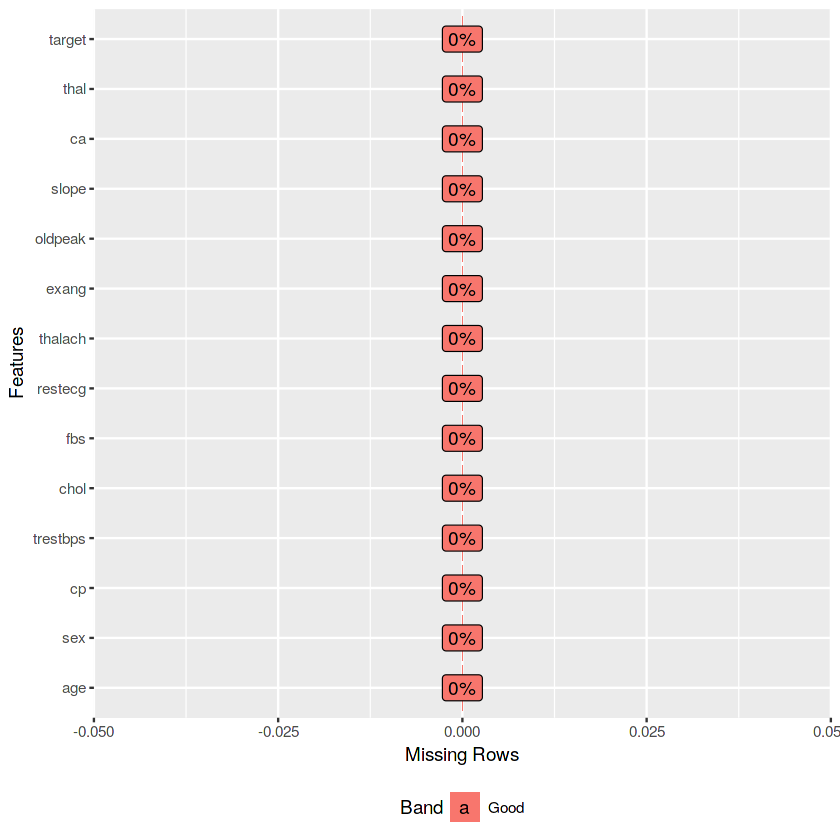

In [3]:
plot_missing(data)

<a id="subsection2"></a>
## 3.2. Transformation

In [4]:
data2 <- data %>% 
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

<a id="subsection3"></a>
## 3.3. Summary Statistics

In [5]:
summary(data2)

 target        sex         fbs      exang                    cp     
 NO :138   FEMALE: 96   <=120:258   NO :204   ASYMPTOMATIC    :166  
 YES:165   MALE  :207   >120 : 45   YES: 99   ATYPICAL ANGINA : 50  
                                              NON-ANGINAL PAIN: 87  
                                                                    
                                                                    
                                                                    
                 restecg    slope   ca      thal         age       
 ABNORMALITY         :152   0: 21   0:175   0:  2   Min.   :29.00  
 NORMAL              :147   1:140   1: 65   1: 18   1st Qu.:47.50  
 PROBABLE OR DEFINITE:  4   2:142   2: 38   2:166   Median :55.00  
                                    3: 20   3:117   Mean   :54.37  
                                    4:  5           3rd Qu.:61.00  
                                                    Max.   :77.00  
    trestbps          chol          thala

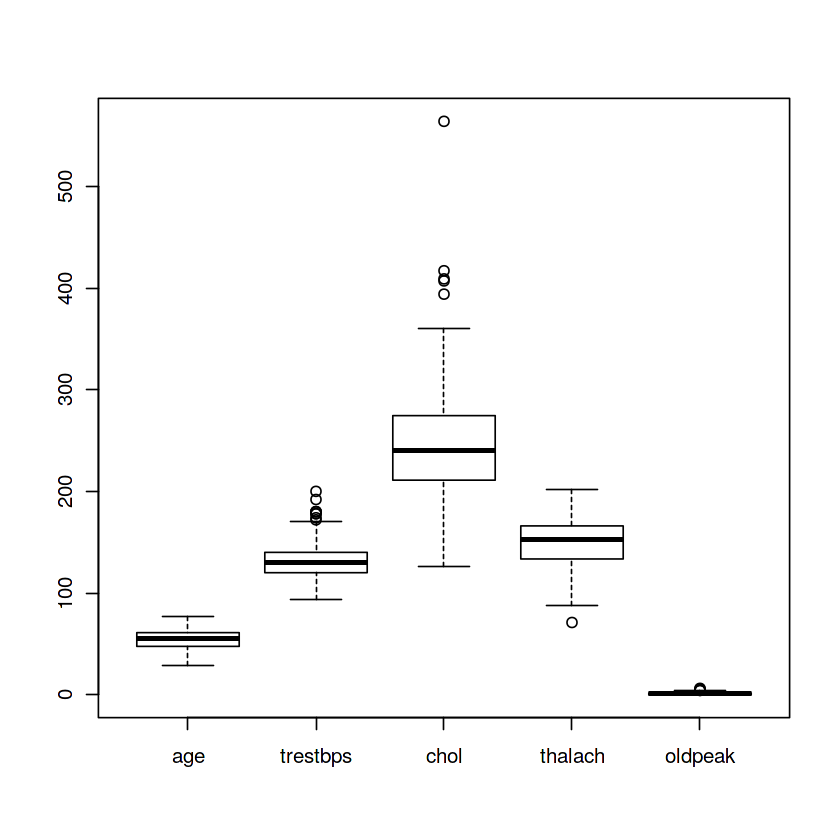

In [6]:
boxplot(data2[,10:14])

<a id="subsection4"></a>
## 3.4. Data Visualization

Warning message:
“Use of `data2$target` is discouraged. Use `target` instead.”Warning message:
“Use of `data2$target` is discouraged. Use `target` instead.”

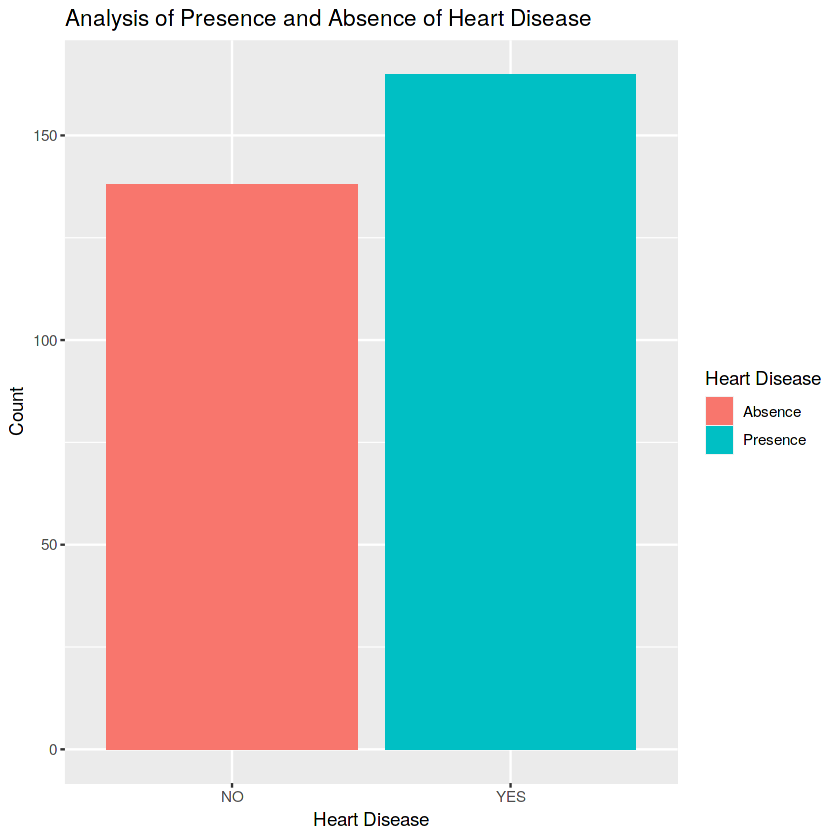

In [7]:
# Bar plot for target (Heart disease) 
ggplot(data2, aes(x=data2$target, fill=data2$target)) + 
  geom_bar() +
  xlab("Heart Disease") +
  ylab("Count") +
  ggtitle("Analysis of Presence and Absence of Heart Disease") +
  scale_fill_discrete(name = "Heart Disease", labels = c("Absence", "Presence"))

In [8]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

There is not imbalanced issue in the dependent variable.

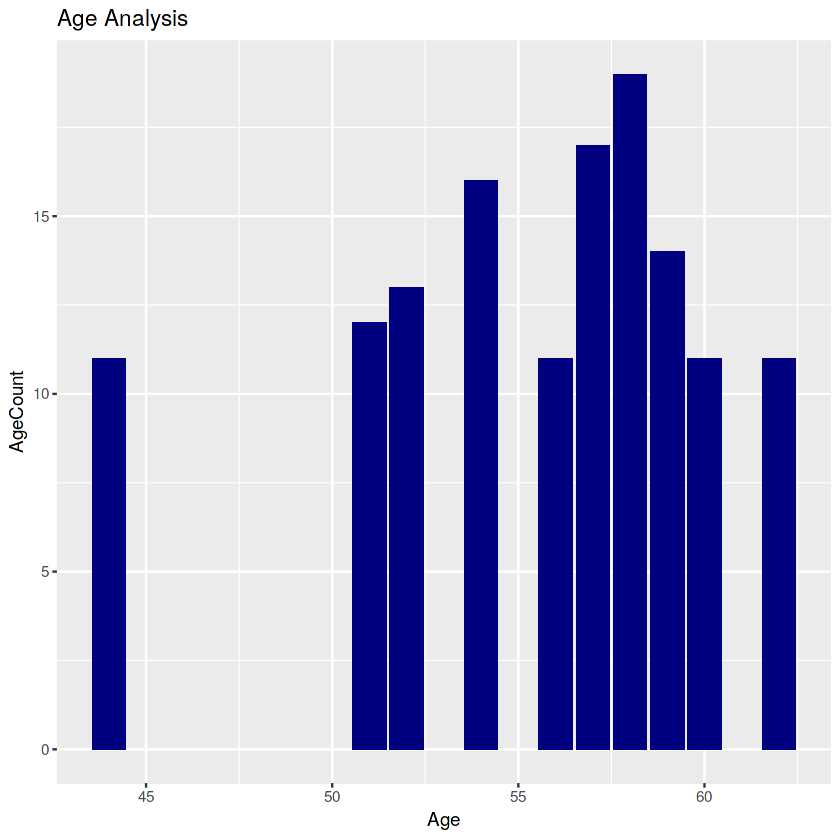

In [9]:
# Counting the frequency of the values of the age
data2 %>% 
  group_by(age) %>% 
  count() %>% 
  filter(n > 10) %>% 
  ggplot()+
  geom_col(aes(age, n), fill = "navyblue")+
  ggtitle("Age Analysis") +
  xlab("Age")  +
  ylab("AgeCount")

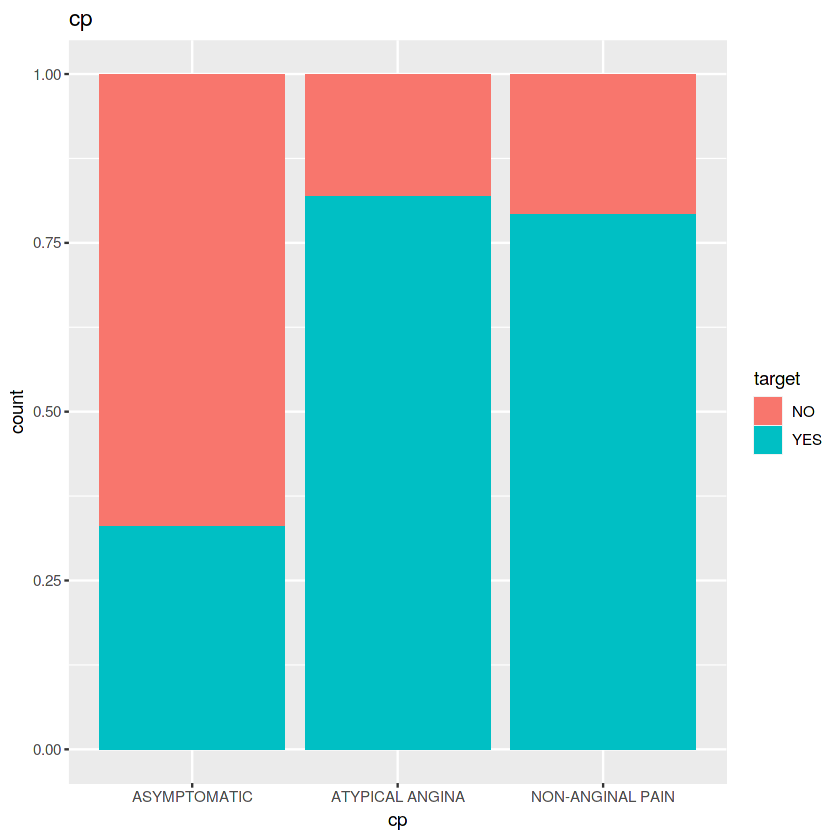

In [10]:
ggplot(data2, aes(cp, fill = target))+
  geom_bar(position = "fill")+
  ggtitle("cp")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


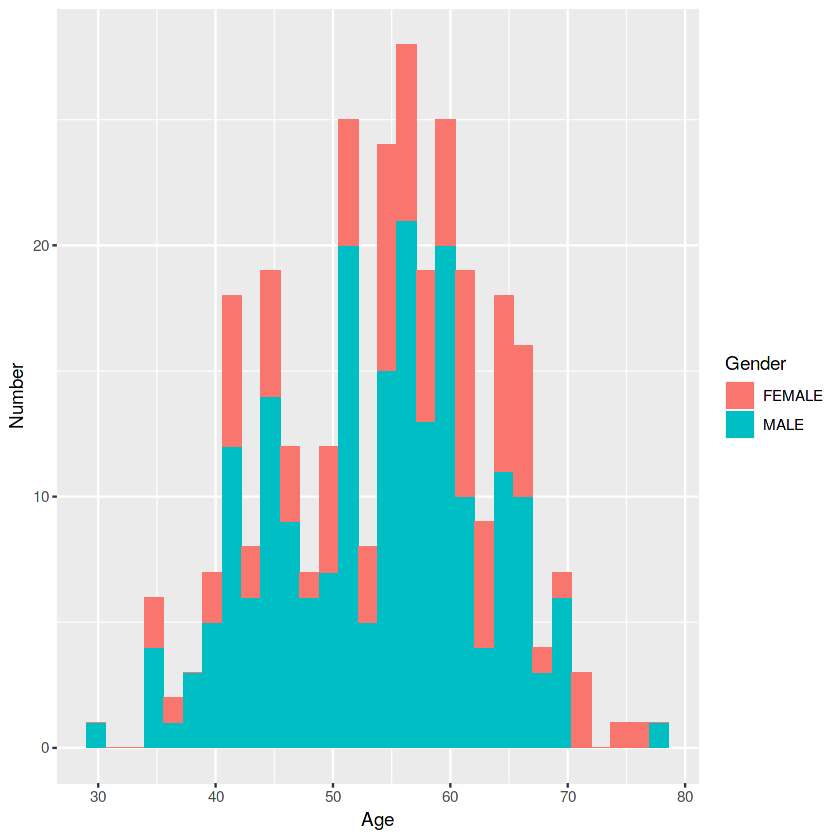

In [11]:
#Distribution of Male and Female population across Age parameter
data2 %>%
  ggplot(aes(x=age,fill=sex))+
  geom_histogram()+
  xlab("Age") + 
  ylab("Number")+
  guides(fill = guide_legend(title = "Gender"))

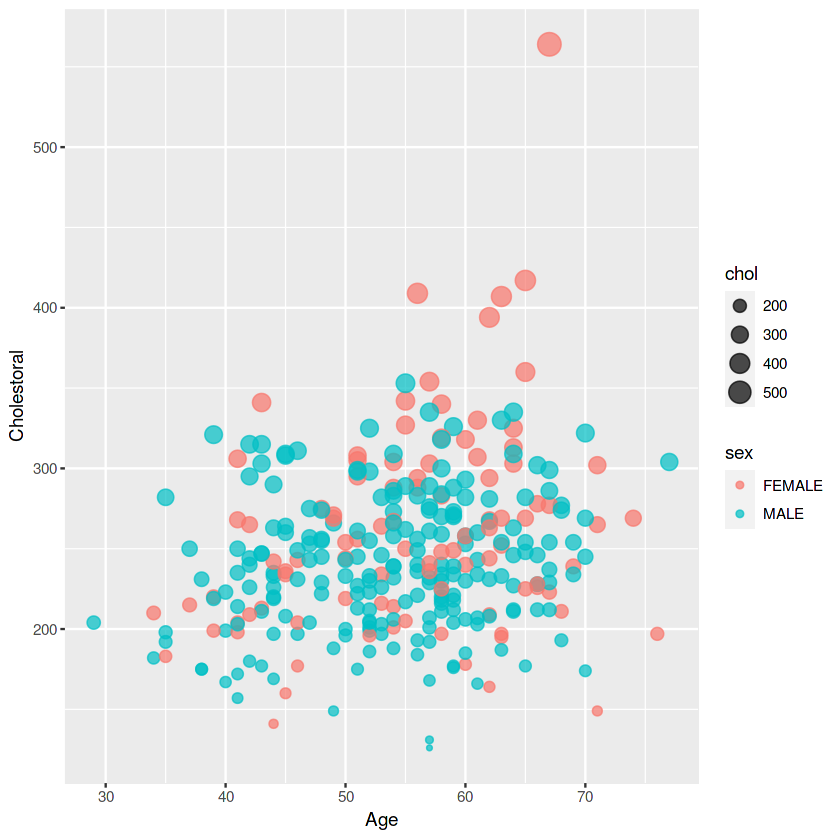

In [12]:
# Representation of Cholestoral level 

data2 %>%
  ggplot(aes(x=age,y=chol,color=sex, size=chol))+
  geom_point(alpha=0.7)+xlab("Age") +
  ylab("Cholestoral")+
  guides(fill = guide_legend(title = "Gender"))

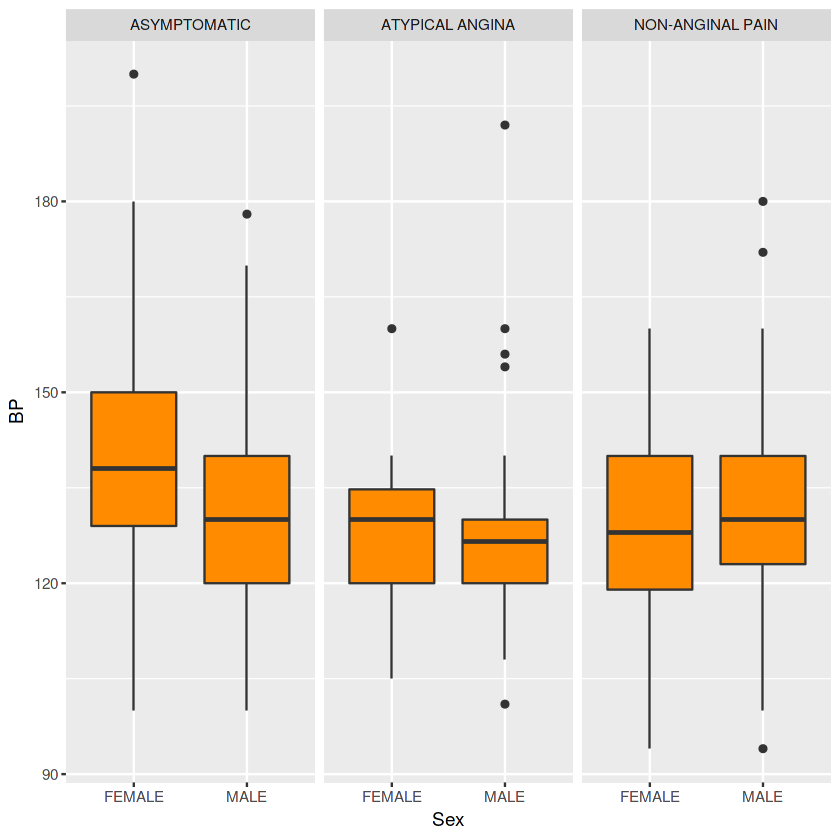

In [13]:
# Comparison of Blood pressure across pain type 
data2 %>%
  ggplot(aes(x=sex,y=trestbps))+
  geom_boxplot(fill="darkorange")+
  xlab("Sex")+
  ylab("BP")+
  facet_grid(~cp)

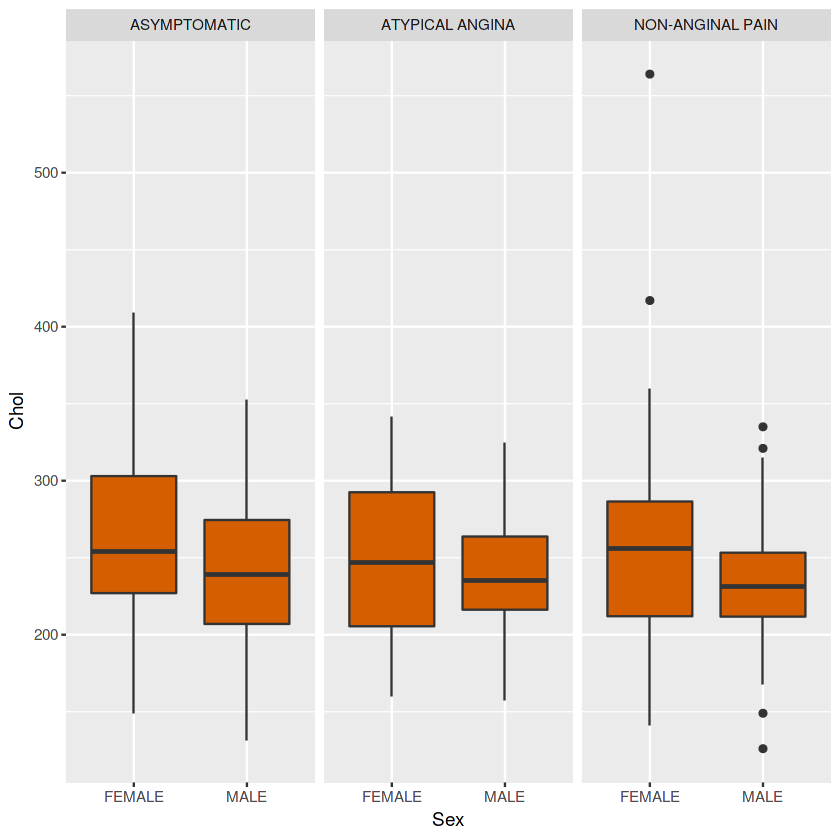

In [14]:
# Comparison of Cholestoral across pain type 
data2 %>%
  ggplot(aes(x=sex,y=chol))+
  geom_boxplot(fill="#D55E00")+
  xlab("Sex")+
  ylab("Chol")+
  facet_grid(~cp)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


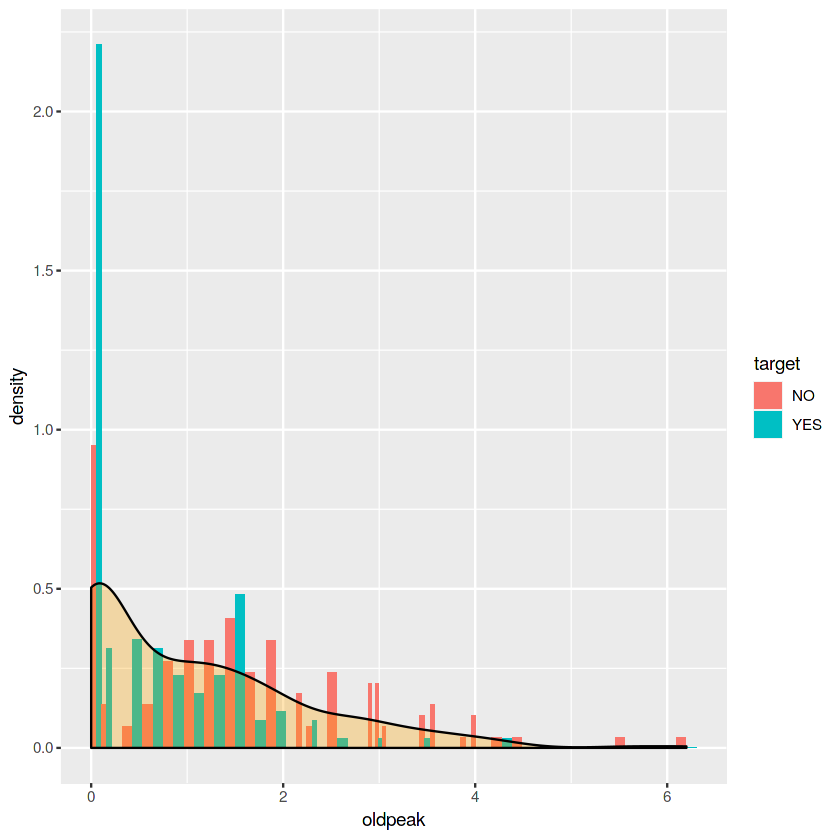

In [15]:
ggplot(data2)+
  geom_histogram(aes( x = oldpeak, y = ..density.., fill =  target), position = position_dodge2())+
  geom_density(aes( x = oldpeak), alpha =.3 ,fill = "orange")

**Correlation**

,age,trestbps,chol,thalach,oldpeak
age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


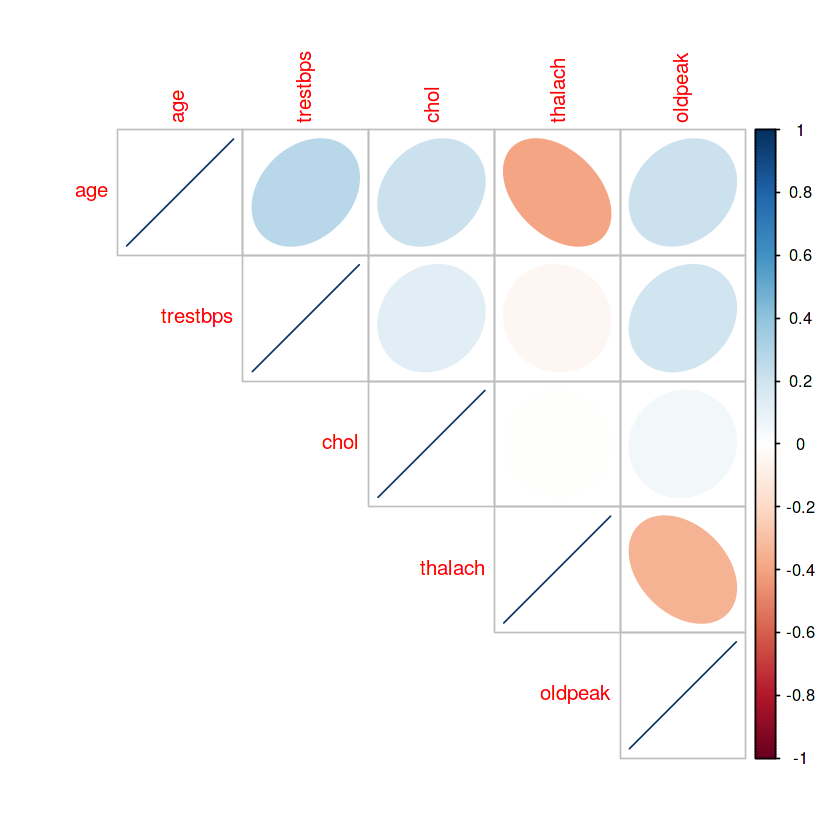

In [16]:
cor_heart <- cor(data2[,10:14])
cor_heart

corrplot(cor_heart, method = "ellipse", type="upper",)

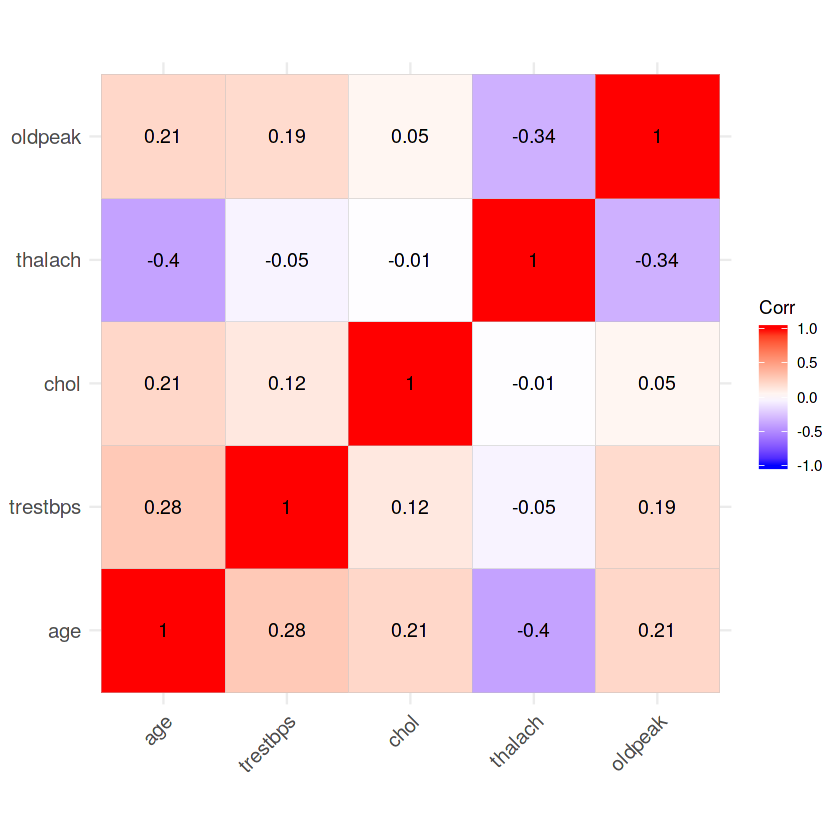

In [17]:
ggcorrplot(cor_heart,lab = T)

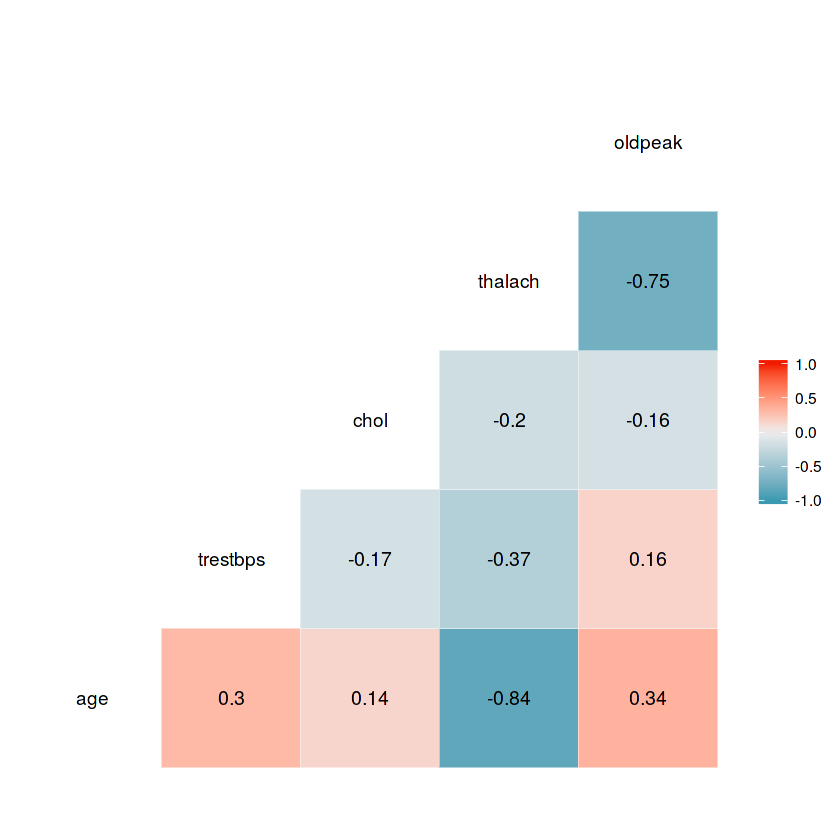

In [18]:
ggcorr(cor_heart, label = T, label_round = 2)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:randomForest’:

    combine

The following object is masked from ‘package:dplyr’:

    combine



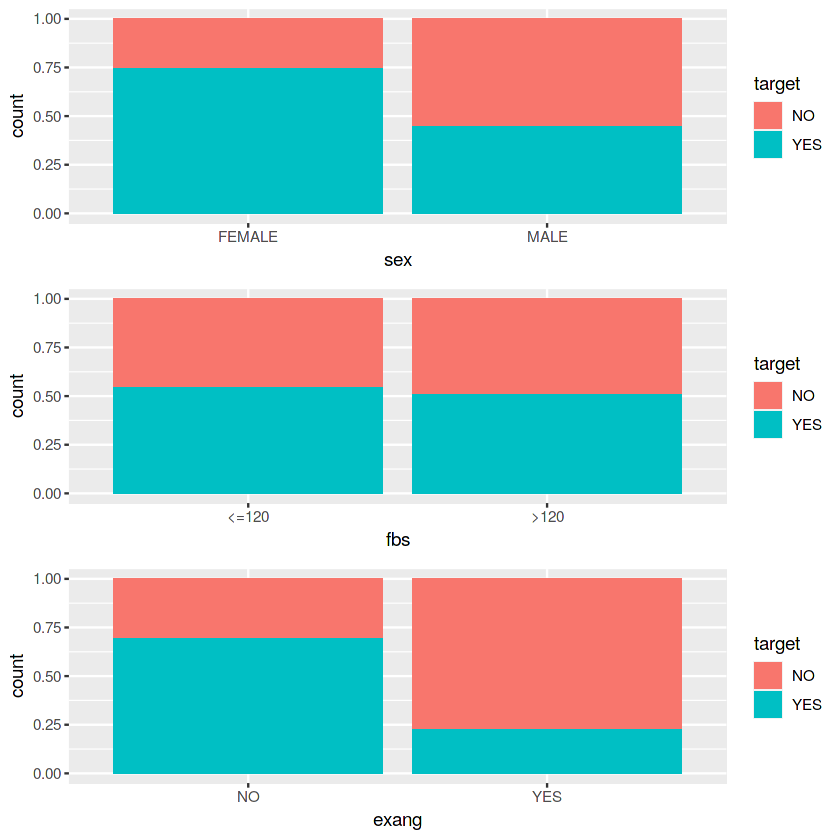

In [19]:
library(gridExtra)

grid.arrange(
  ggplot(data2, aes(x = sex, fill = target))+
  geom_bar(position = "fill"),
  
  ggplot(data2, aes(x = fbs, fill = target))+
  geom_bar(position = "fill"),
  
  ggplot(data2, aes(x = exang, fill = target))+
  geom_bar(position = "fill"), nrow = 3
  )

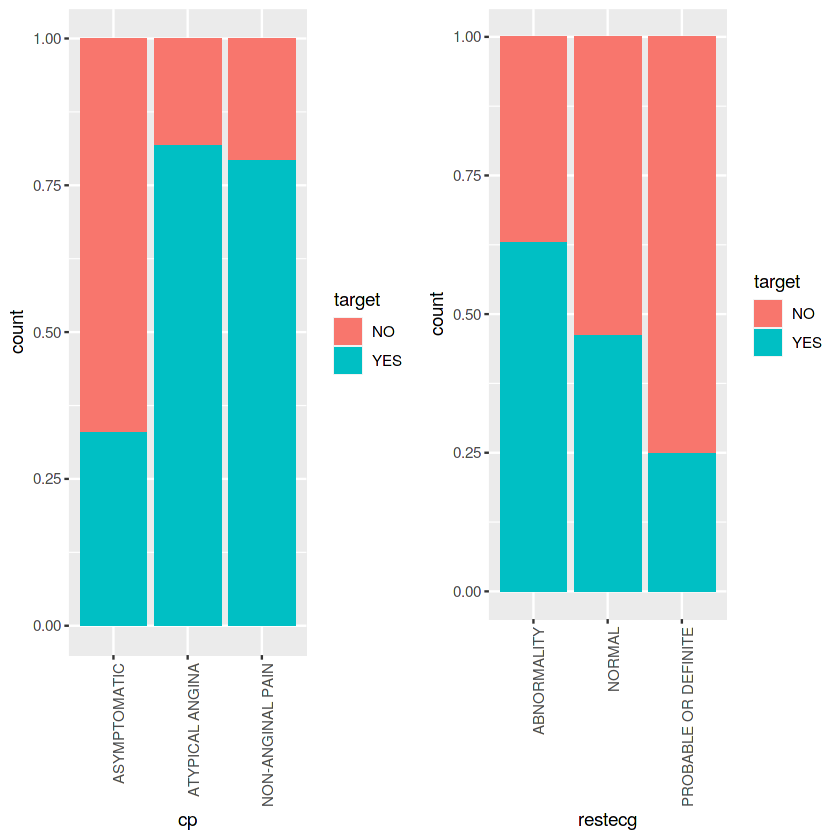

In [20]:
grid.arrange(
  ggplot(data2, aes(x = cp, fill = target))+
  geom_bar(position = "fill")+ theme(axis.text.x = element_text(angle = 90, hjust = 1)),
  
  ggplot(data2, aes(x = restecg, fill = target))+
  geom_bar(position = "fill")+ theme(axis.text.x = element_text(angle = 90, hjust = 1)), ncol = 2
)

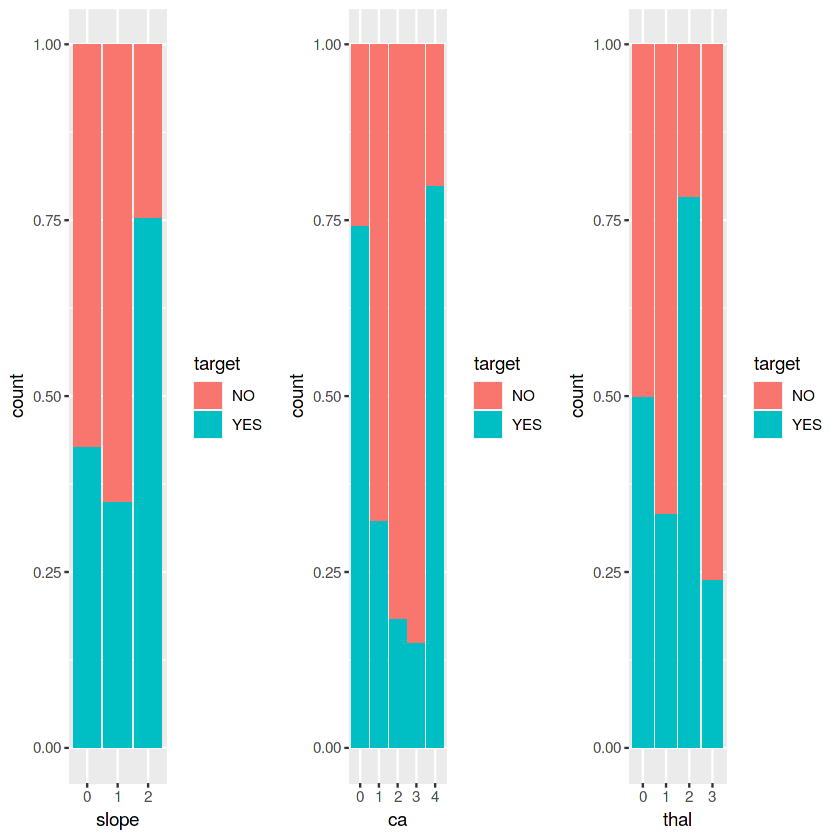

In [21]:
grid.arrange(
  ggplot(data2, aes(x = slope, fill = target))+
  geom_bar(position = "fill"), ncol = 3,
  
  ggplot(data2, aes(x = ca, fill = target))+
  geom_bar(position = "fill"),
  
  ggplot(data2, aes(x = thal, fill = target))+
  geom_bar(position = "fill")
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


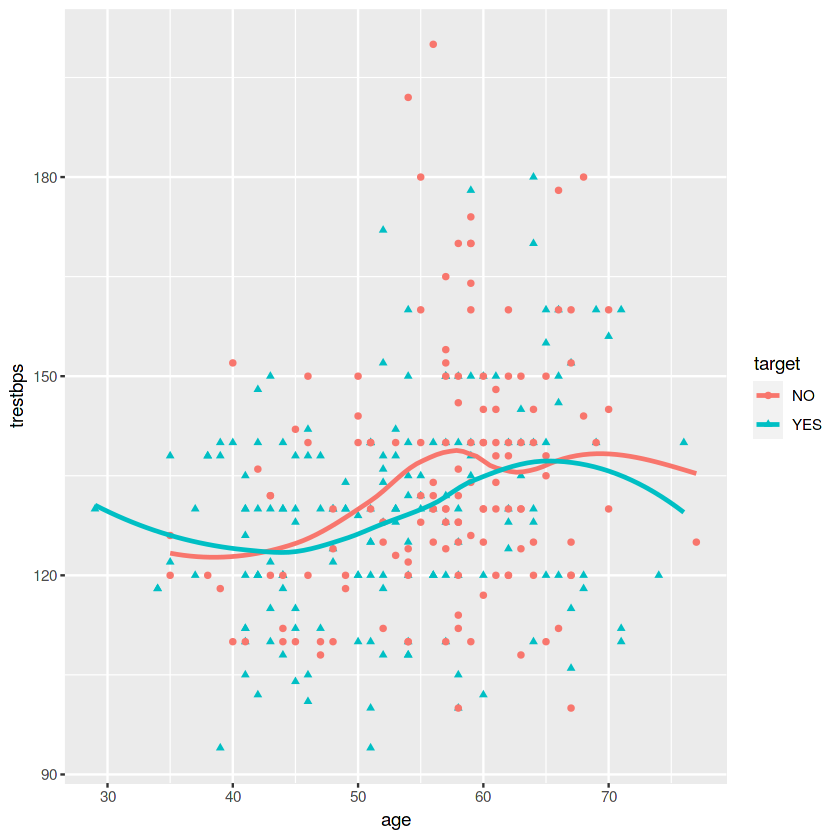

In [22]:
ggplot(data2, aes(x = age, y = trestbps, color = target, shape = target))+
  geom_point()+
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


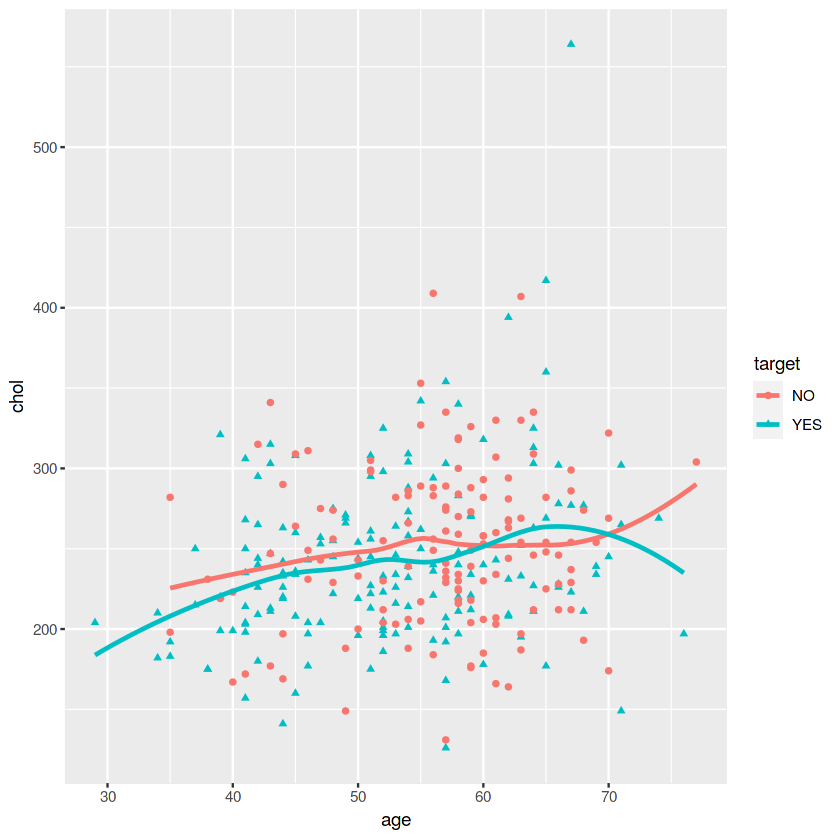

In [23]:
ggplot(data2, aes(x = age, y = chol, color = target, shape = target))+
  geom_point()+
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


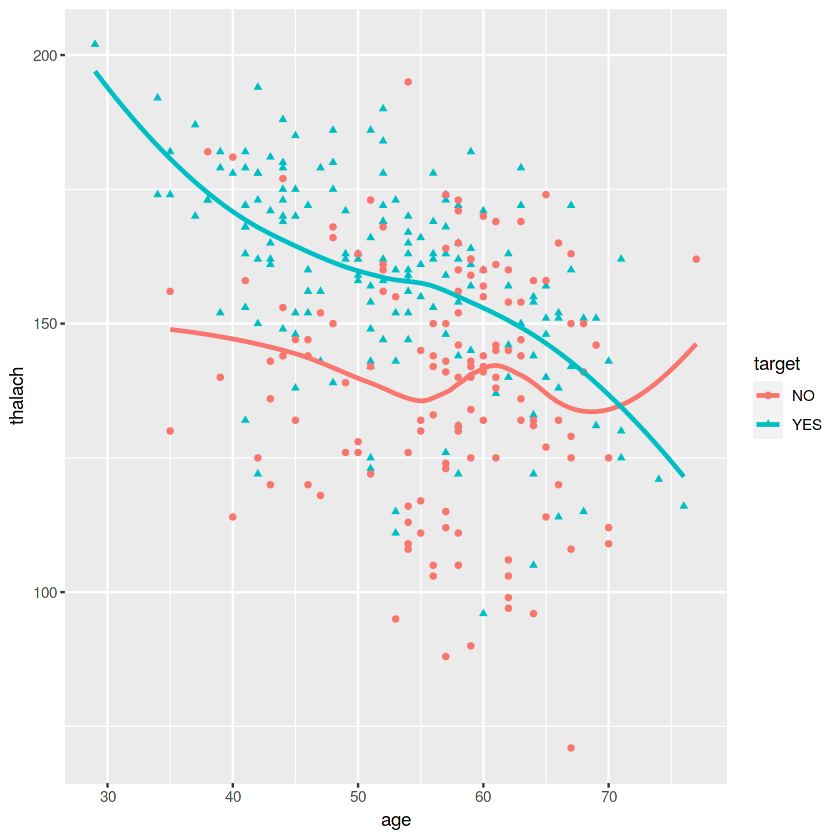

In [24]:
ggplot(data2, aes(x = age, y = thalach, color = target, shape = target))+
  geom_point()+
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


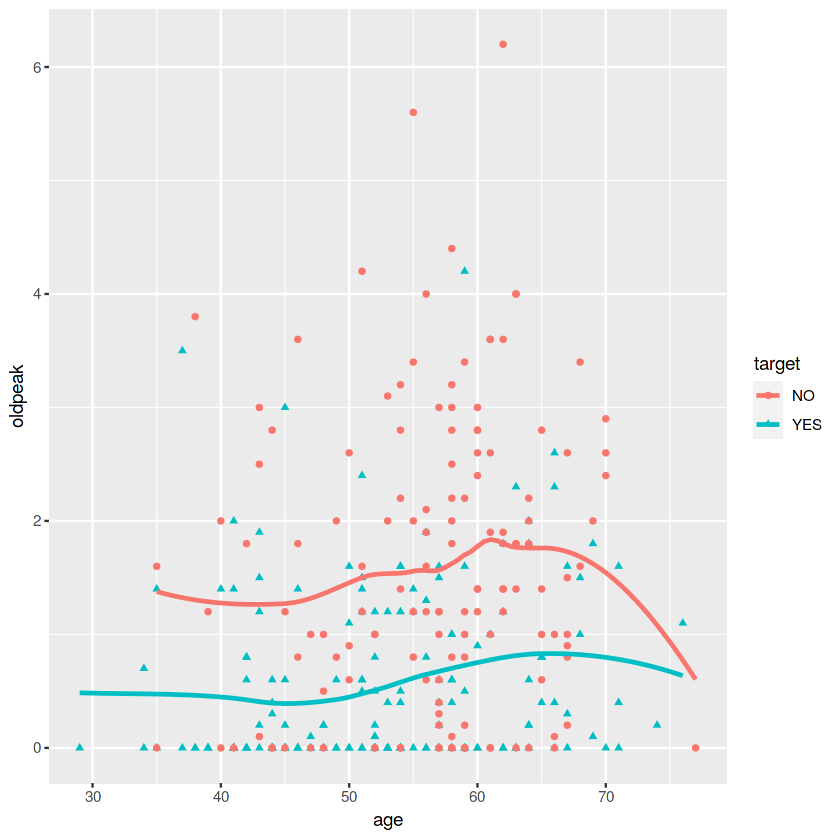

In [25]:
ggplot(data2, aes(x = age, y = oldpeak, color = target, shape = target))+
  geom_point()+
  geom_smooth(se = FALSE)

<a id="section4"></a>
#  4. PCA - PRINCIPLE COMPONENT ANALYSIS

In [26]:
pca <- prcomp(data2[,10:14], scale = TRUE) # prcomp temel bileşen fonksiyonudur
pca

Standard deviations (1, .., p=5):
[1] 1.3440891 1.0380499 0.9398811 0.8713045 0.6879891

Rotation (n x k) = (5 x 5):
                PC1        PC2        PC3        PC4        PC5
age      -0.5673990  0.1084469 -0.1783796 -0.5199937  0.6033944
trestbps -0.3758463  0.4231668  0.7394680 -0.1439024 -0.3348860
chol     -0.2453800  0.6922836 -0.5317555  0.3781374 -0.1864944
thalach   0.5056805  0.4824636  0.2983680  0.1733984  0.6264389
oldpeak  -0.4699721 -0.3116750  0.2226667  0.7320135  0.3107422

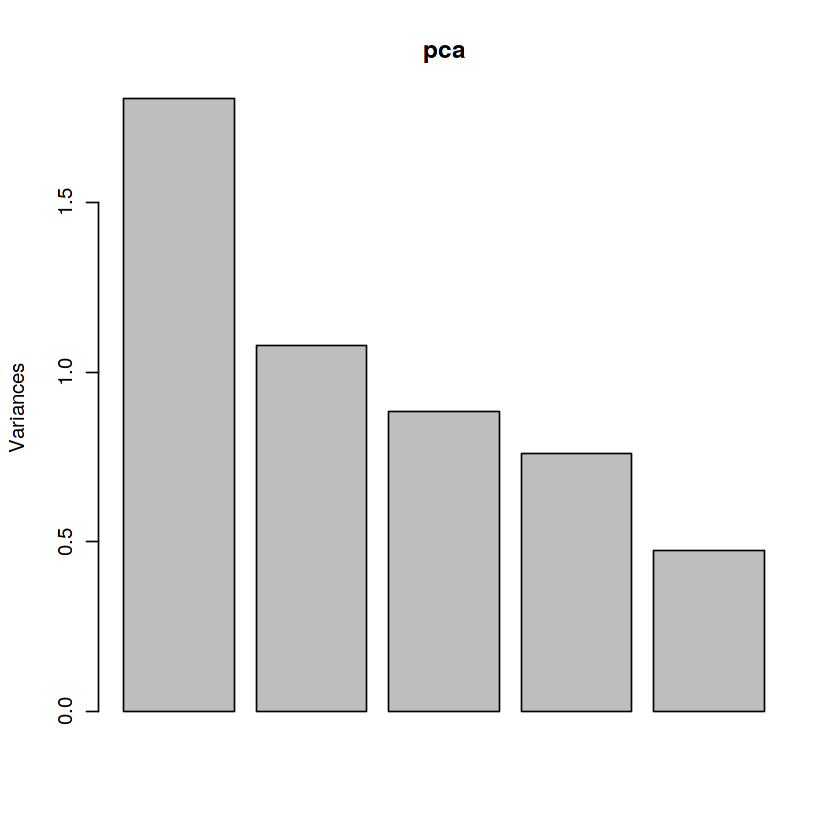

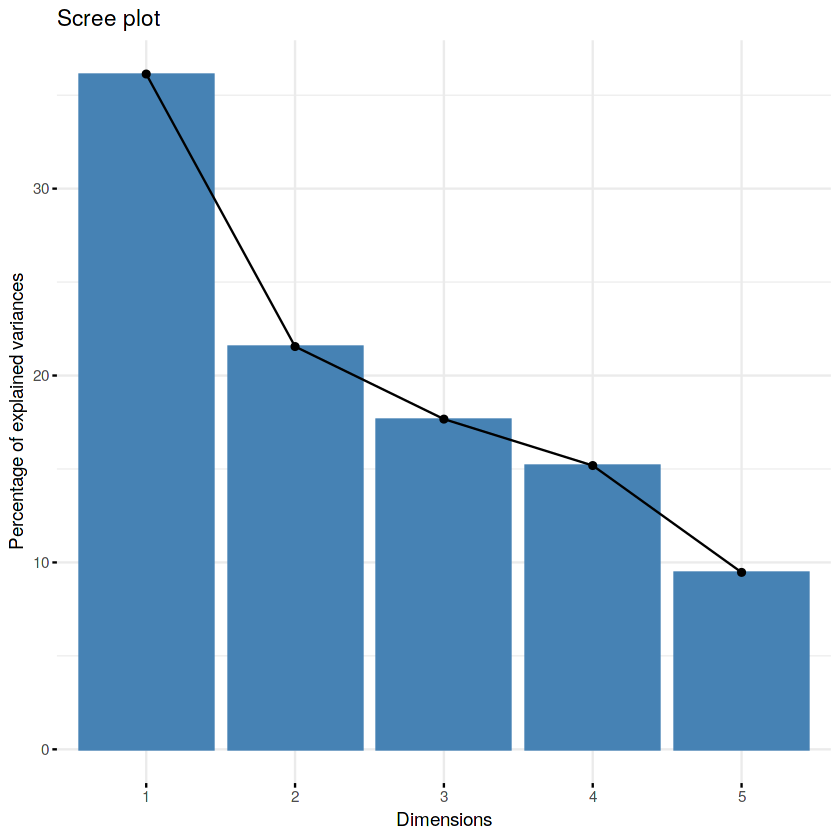

In [27]:
screeplot(pca)

fviz_screeplot(pca)

Component Variance:

In [28]:
pca$sdev^2

[1] 1.8065754 1.0775475 0.8833766 0.7591714 0.4733290

In [29]:
pca$rotation <- -pca$rotation

pca

Standard deviations (1, .., p=5):
[1] 1.3440891 1.0380499 0.9398811 0.8713045 0.6879891

Rotation (n x k) = (5 x 5):
                PC1        PC2        PC3        PC4        PC5
age       0.5673990 -0.1084469  0.1783796  0.5199937 -0.6033944
trestbps  0.3758463 -0.4231668 -0.7394680  0.1439024  0.3348860
chol      0.2453800 -0.6922836  0.5317555 -0.3781374  0.1864944
thalach  -0.5056805 -0.4824636 -0.2983680 -0.1733984 -0.6264389
oldpeak   0.4699721  0.3116750 -0.2226667 -0.7320135 -0.3107422

In [30]:
pca$x <- -pca$x

head(pca$x)

PC1,PC2,PC3,PC4,PC5
1.26562200,0.08222156,-0.77681180,-0.096463607,-0.712893339
-0.93081032,0.07031681,-1.19271246,-2.868844555,-0.543846008
-1.41755513,0.38919460,-0.98796067,-0.866703001,-0.002843224
-0.91857160,-0.26348764,0.09349639,0.009463352,-1.078731780
-0.04725251,-1.58924385,1.55750221,-0.554518365,-0.256823351
-0.13539506,0.35422683,-0.71404981,1.031120511,0.005937274


In [31]:
pca

Standard deviations (1, .., p=5):
[1] 1.3440891 1.0380499 0.9398811 0.8713045 0.6879891

Rotation (n x k) = (5 x 5):
                PC1        PC2        PC3        PC4        PC5
age       0.5673990 -0.1084469  0.1783796  0.5199937 -0.6033944
trestbps  0.3758463 -0.4231668 -0.7394680  0.1439024  0.3348860
chol      0.2453800 -0.6922836  0.5317555 -0.3781374  0.1864944
thalach  -0.5056805 -0.4824636 -0.2983680 -0.1733984 -0.6264389
oldpeak   0.4699721  0.3116750 -0.2226667 -0.7320135 -0.3107422

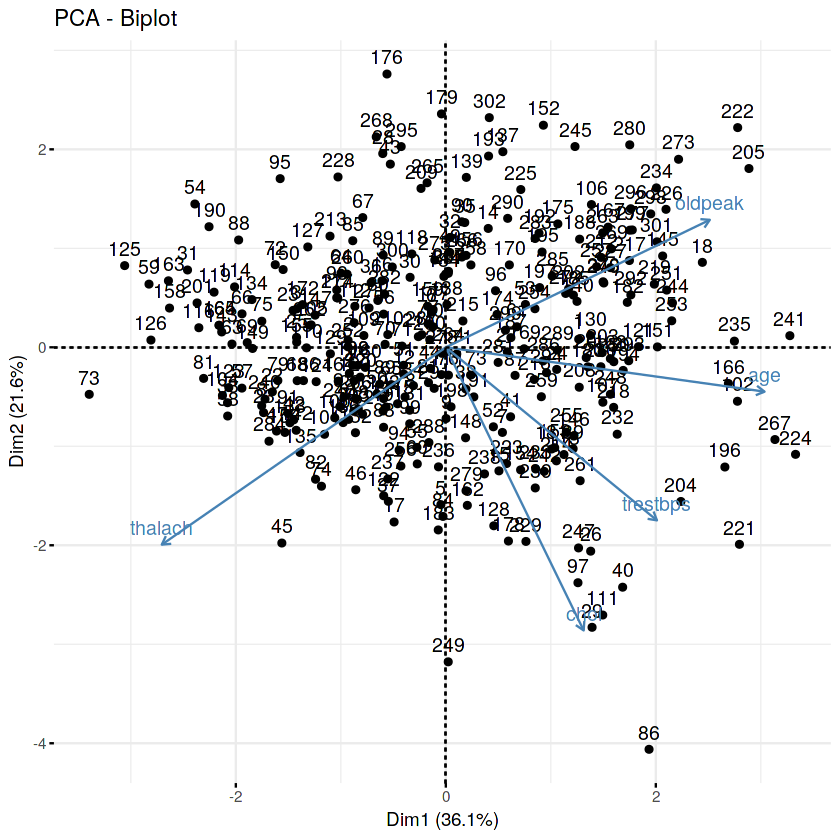

In [32]:
fviz_pca(pca)

In [33]:
s_df <- apply(data2[,10:14], 2, scale)
head(s_df)

age,trestbps,chol,thalach,oldpeak
0.9506240,0.76269408,-0.25591036,0.01541728,1.0855423
-1.9121497,-0.09258463,0.07208025,1.63077374,2.1190672
-1.4717230,-0.09258463,-0.81542377,0.97589950,0.3103986
0.1798773,-0.66277043,-0.19802967,1.23784920,-0.2063639
0.2899839,-0.66277043,2.07861109,0.58297496,-0.3786180
0.2899839,0.47760118,-1.04694656,-0.07189928,-0.5508722


In [34]:
cov_df <- cov(s_df)
cov_df

,age,trestbps,chol,thalach,oldpeak
age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


In [35]:
ei_df <- eigen(cov_df)
ei_df

eigen() decomposition
$values
[1] 1.8065754 1.0775475 0.8833766 0.7591714 0.4733290

$vectors
           [,1]       [,2]       [,3]       [,4]       [,5]
[1,] -0.5673990 -0.1084469  0.1783796  0.5199937  0.6033944
[2,] -0.3758463 -0.4231668 -0.7394680  0.1439024 -0.3348860
[3,] -0.2453800 -0.6922836  0.5317555 -0.3781374 -0.1864944
[4,]  0.5056805 -0.4824636 -0.2983680 -0.1733984  0.6264389
[5,] -0.4699721  0.3116750 -0.2226667 -0.7320135  0.3107422


In [36]:
str(ei_df)

List of 2
 $ values : num [1:5] 1.807 1.078 0.883 0.759 0.473
 $ vectors: num [1:5, 1:5] -0.567 -0.376 -0.245 0.506 -0.47 ...
 - attr(*, "class")= chr "eigen"


In [37]:
ei_df$vectors[,1:2]

-0.5673990,-0.1084469
-0.3758463,-0.4231668
-0.2453800,-0.6922836
0.5056805,-0.4824636
-0.4699721,0.3116750


In [38]:
p <- ei_df$vectors[,1:2]
p <- -p
row.names(p) <- c("age", "trestbps", "chol","thalach","oldpeak")
colnames(p) <- c("PC1","PC2")
p

,PC1,PC2
age,0.5673990,0.1084469
trestbps,0.3758463,0.4231668
chol,0.2453800,0.6922836
thalach,-0.5056805,0.4824636
oldpeak,0.4699721,-0.3116750


In [39]:
# explainable variance ratio
avo <- ei_df$values / sum(ei_df$values)
round(avo, 2)

[1] 0.36 0.22 0.18 0.15 0.09

In [40]:
sum(avo[1:2])

[1] 0.5768246

<a id="section5"></a>
# 5. K-Means

In [41]:
profiling_num(data2)

  variable mean std_dev variation_coef p_01 p_05 p_25  p_50  p_75  p_95  p_99
1      age   54     9.1           0.17   35   39   48  55.0  61.0  68.0  71.0
2 trestbps  132    17.5           0.13  100  108  120 130.0 140.0 160.0 180.0
3     chol  246    51.8           0.21  149  175  211 240.0 274.5 326.9 406.7
4  thalach  150    22.9           0.15   95  108  134 153.0 166.0 181.9 192.0
5  oldpeak    1     1.2           1.12    0    0    0   0.8   1.6   3.4   4.2
  skewness kurtosis  iqr        range_98     range_80
1    -0.20      2.4 13.5        [35, 71]     [42, 66]
2     0.71      3.9 20.0      [100, 180]   [110, 152]
3     1.14      7.4 63.5   [149, 406.74] [188, 308.8]
4    -0.53      2.9 32.5 [95.02, 191.96] [116, 176.6]
5     1.26      4.5  1.6        [0, 4.2]     [0, 2.8]


In [42]:
uns_df <- scale(data2[,10:14])

head(as_tibble(uns_df))

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.95,0.763,-0.256,0.015,1.09
-1.91,-0.093,0.072,1.631,2.12
-1.47,-0.093,-0.815,0.976,0.31
0.18,-0.663,-0.198,1.238,-0.21
0.29,-0.663,2.079,0.583,-0.38
0.29,0.478,-1.047,-0.072,-0.55


In [43]:
distance <- get_dist(uns_df)
head(distance)

[1] 3.6 2.9 2.4 3.2 2.0 1.7

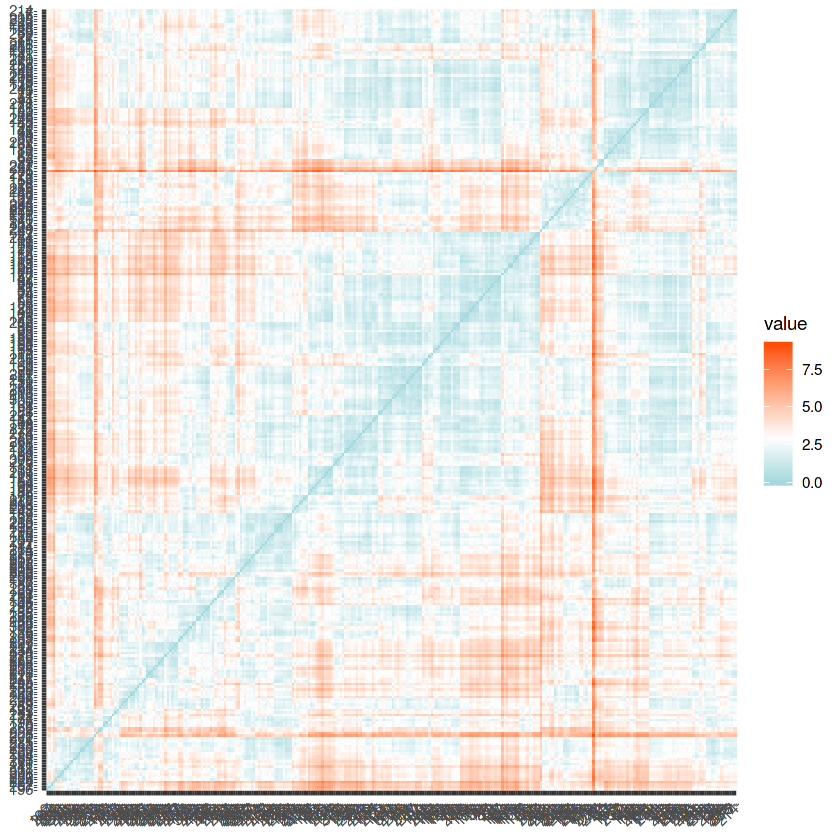

In [44]:
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

In [45]:
k2 <- kmeans(uns_df, 
             center = 2,
             nstart = 25  )

str(k2)

List of 9
 $ cluster     : int [1:303] 2 1 1 1 1 1 2 1 1 1 ...
 $ centers     : num [1:2, 1:5] -0.542 0.711 -0.336 0.441 -0.242 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:5] "age" "trestbps" "chol" "thalach" ...
 $ totss       : num 1510
 $ withinss    : num [1:2] 512 623
 $ tot.withinss: num 1136
 $ betweenss   : num 374
 $ size        : int [1:2] 172 131
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [46]:
k2

K-means clustering with 2 clusters of sizes 172, 131

Cluster means:
    age trestbps  chol thalach oldpeak
1 -0.54    -0.34 -0.24    0.52   -0.45
2  0.71     0.44  0.32   -0.68    0.60

Clustering vector:
  [1] 2 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1
 [38] 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2
[112] 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 1
[149] 1 1 2 2 2 2 1 2 1 1 1 1 1 2 1 1 1 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 2 2 1 1 2
[186] 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2
[223] 2 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2
[260] 1 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 2 1 2 2 2 1 2
[297] 1 2 2 1 2 2 1

Within cluster sum of squares by cluster:
[1] 512 623
 (between_SS / total_SS =  24.8 %)

Available components:

[1] "cluster"      "

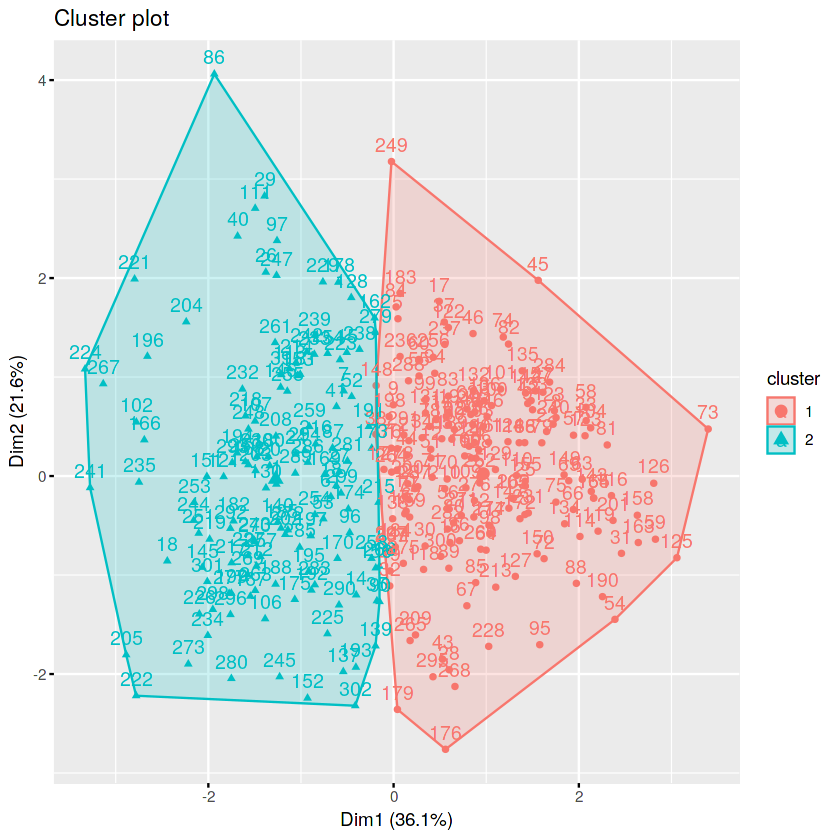

In [47]:
fviz_cluster(k2, data = uns_df)

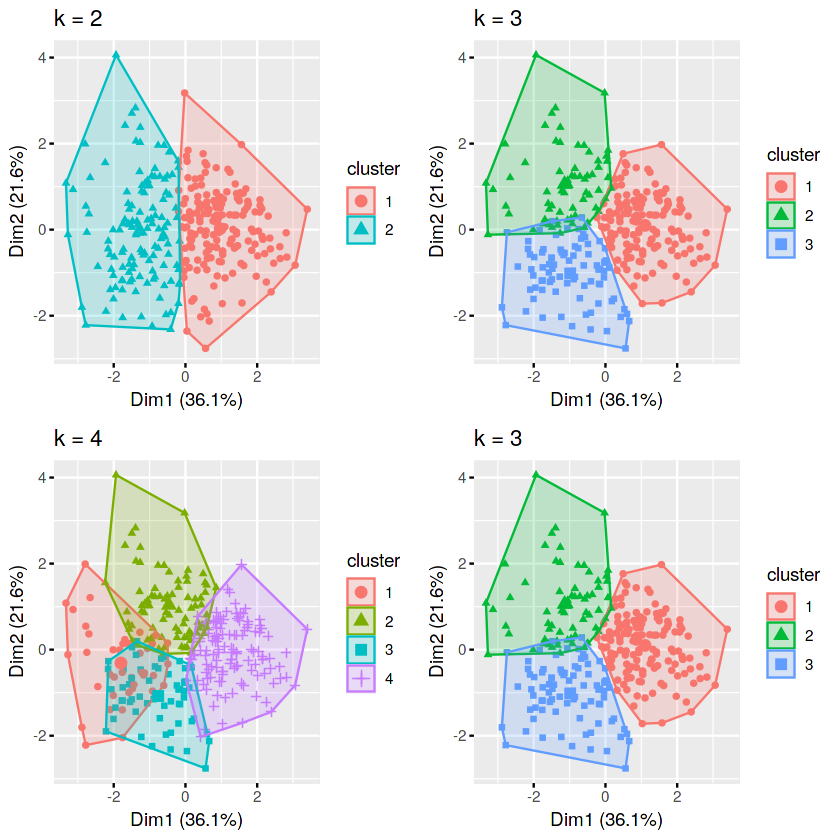

In [48]:
# k2
k3 <- kmeans(uns_df, centers = 3, nstart = 25)
k4 <- kmeans(uns_df, centers = 4, nstart = 25)
k5 <- kmeans(uns_df, centers = 5, nstart = 25)

p1 <- fviz_cluster(k2, geom = "point", data = uns_df)+
  ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point", data = uns_df)+
  ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point", data = uns_df)+
  ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point", data = uns_df)+
  ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1,p2,p3,p2, nrow = 2)

<a id="subsection5"></a>
## 5.1. Optimum Cluster Number

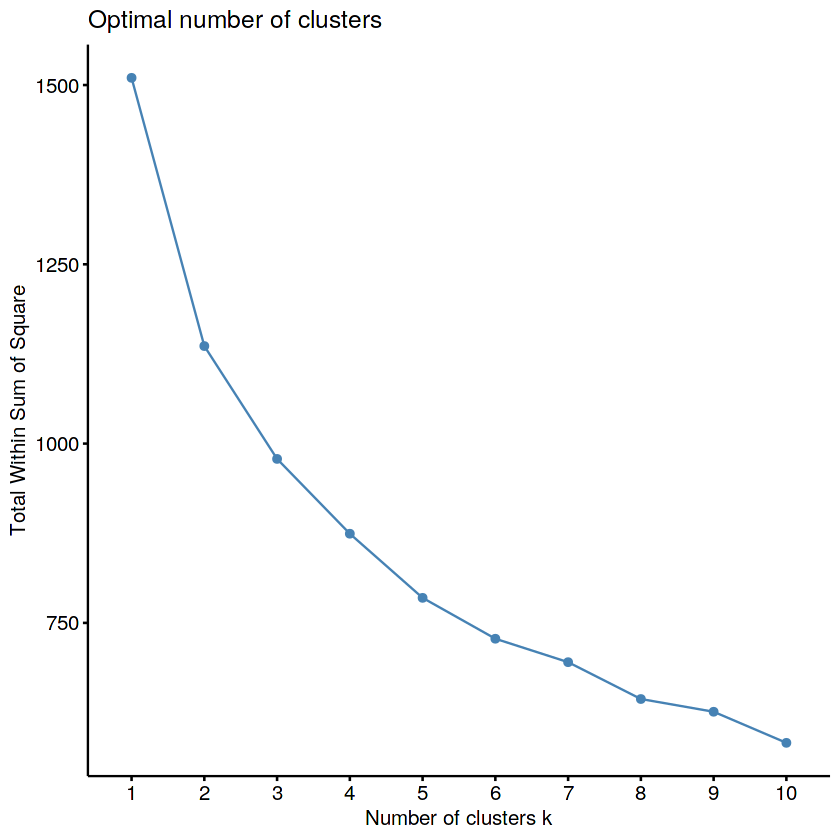

In [49]:
# Elbow Method
set.seed(123)
fviz_nbclust(uns_df, kmeans, method = "wss")

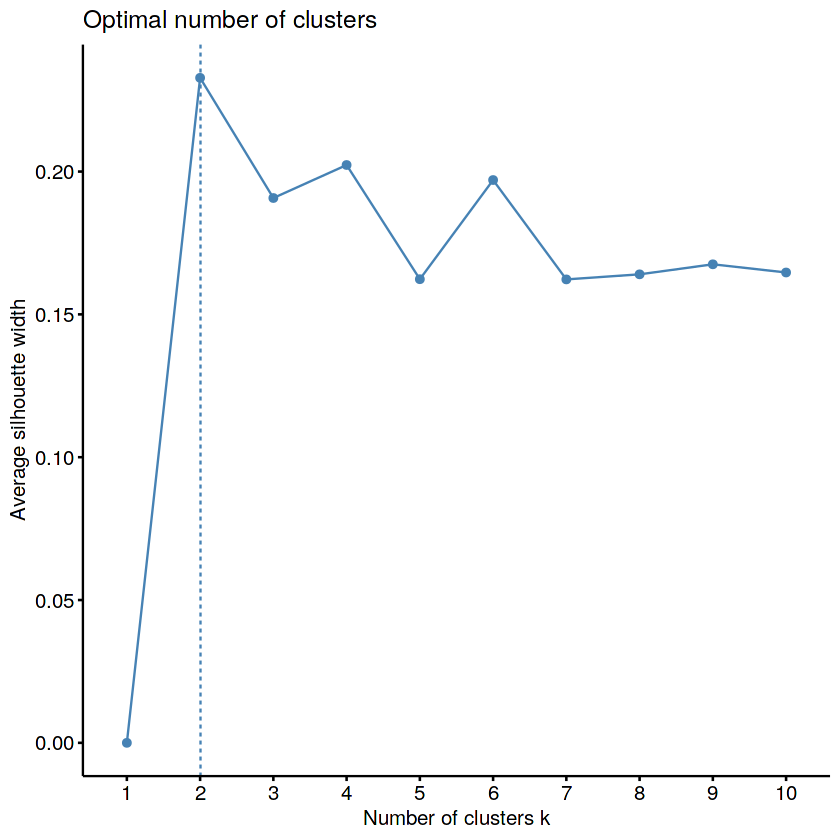

In [50]:
# Average Silouette Method
fviz_nbclust(uns_df, kmeans, method = "silhouette")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = uns_df, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 2
      logW E.logW  gap SE.sim
 [1,]  5.4    6.0 0.55  0.011
 [2,]  5.3    5.8 0.57  0.011
 [3,]  5.2    5.7 0.56  0.011
 [4,]  5.1    5.7 0.53  0.012
 [5,]  5.1    5.6 0.53  0.012
 [6,]  5.0    5.6 0.52  0.012
 [7,]  5.0    5.5 0.52  0.012
 [8,]  5.0    5.5 0.52  0.013
 [9,]  4.9    5.4 0.52  0.012
[10,]  4.9    5.4 0.51  0.013


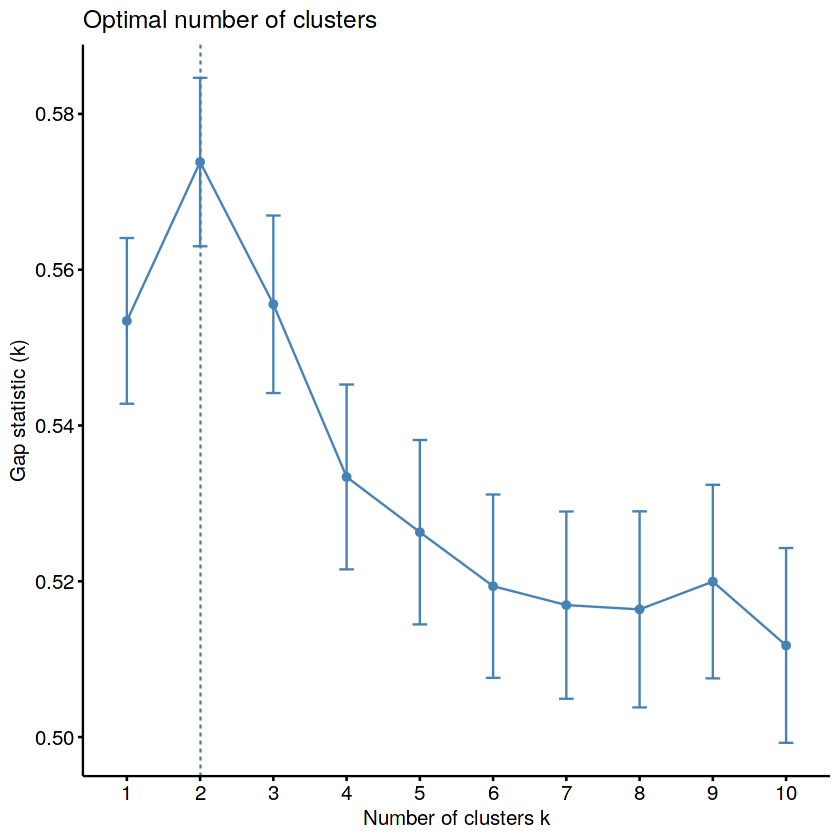

In [51]:
# Gap Statistics
set.seed(123)

gap_stat <- clusGap(uns_df, FUN = kmeans, nstart = 25, K.max = 10, B = 50)

print(gap_stat, method = "firstmax")

fviz_gap_stat(gap_stat)

In [52]:
set.seed(123)

final <- kmeans(uns_df, 2, nstart = 25)
final

K-means clustering with 2 clusters of sizes 172, 131

Cluster means:
    age trestbps  chol thalach oldpeak
1 -0.54    -0.34 -0.24    0.52   -0.45
2  0.71     0.44  0.32   -0.68    0.60

Clustering vector:
  [1] 2 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1
 [38] 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2
[112] 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 1
[149] 1 1 2 2 2 2 1 2 1 1 1 1 1 2 1 1 1 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 2 2 1 1 2
[186] 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2
[223] 2 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2
[260] 1 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 2 1 2 2 2 1 2
[297] 1 2 2 1 2 2 1

Within cluster sum of squares by cluster:
[1] 512 623
 (between_SS / total_SS =  24.8 %)

Available components:

[1] "cluster"      "

<a id="subsection6"></a>
## 5.2. Descriptive Statistics for Clusters

In [53]:
data2[,10:14] %>% 
  mutate(Cluster = final$cluster) %>% 
  group_by(Cluster) %>% 
  summarise_all("mean")

Cluster,age,trestbps,chol,thalach,oldpeak
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49,126,234,162,0.51
2,61,139,263,134,1.73


<a id="section6"></a>
# 6. HIERARCHICAL CLUSTERING

In [54]:
xquant <- data2[10:14] # Numeric variables
xqual <- data2[2:9]    # Categorical variables


tree <- hclustvar(xquant, xqual)

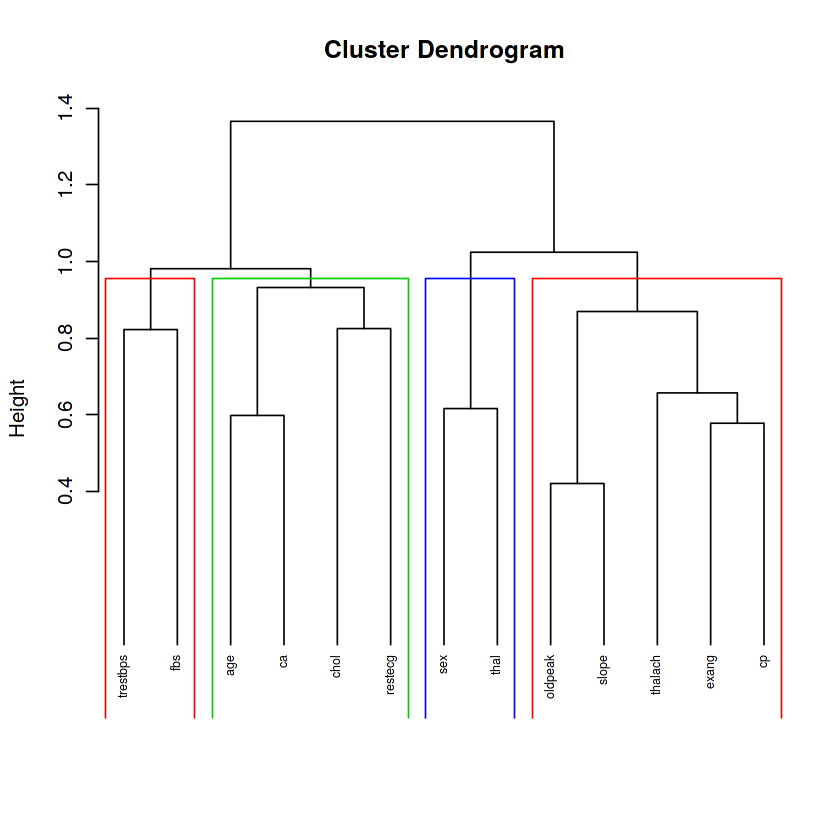

In [55]:
plot(tree, cex = 0.6)
rect.hclust(tree, k = 4, border = 2:4)

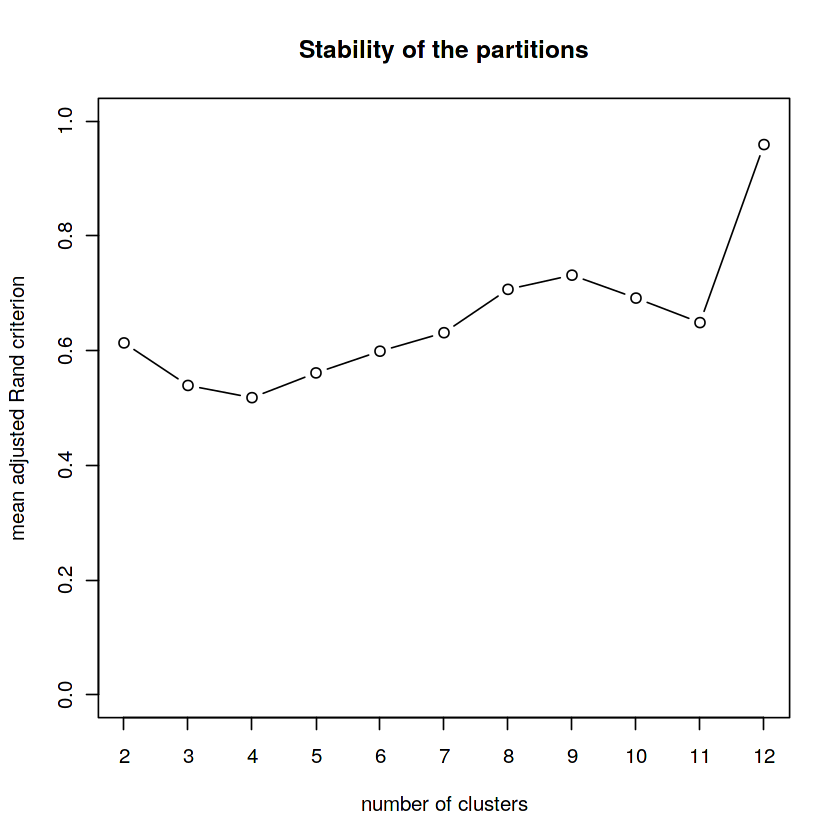

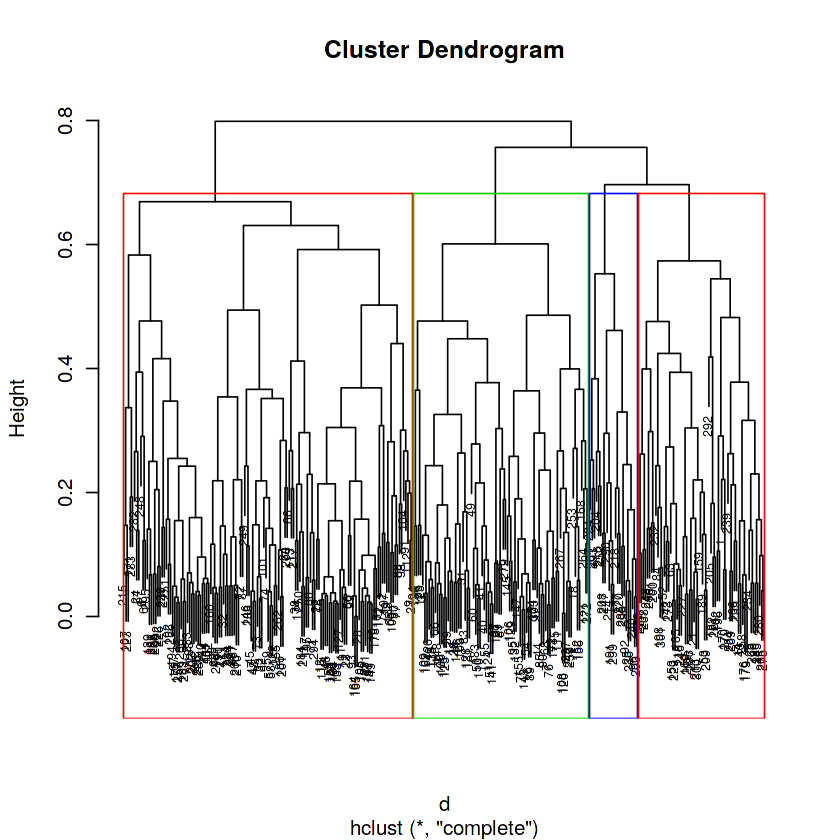

In [56]:
stab <- stability(tree, B=50) # "B=50" refers to the number of bootstrap samples to use in the estimation.

d <- daisy(data2[-1], metric="gower")

fit <- hclust(d=d, method="complete")    # Also try: method="ward.D"   

plot(fit, cex = 0.6)
rect.hclust(fit, k = 4, border = 2:4)

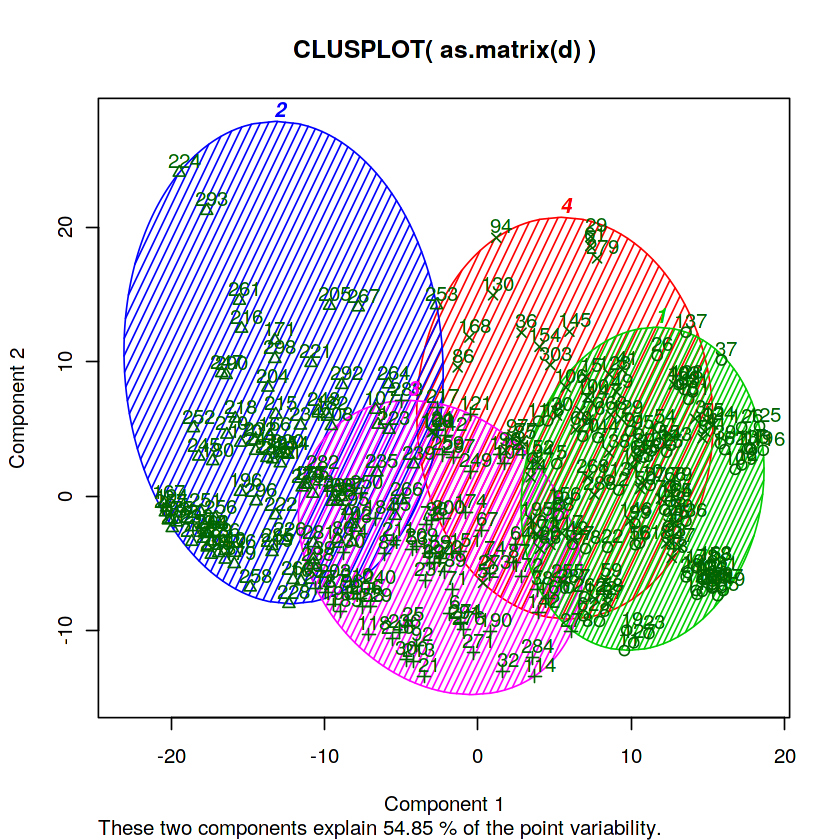

In [57]:
kfit <- kmeans(d, 4)
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)

In [58]:
data2[,"cluster"] <- kfit$cluster

<a id="section7"></a>
# 7. MACHINE LEARNING

In [59]:
train_indeks <- createDataPartition(data2$target, p = 0.7, list = FALSE, times = 1)


train <- data2[train_indeks,]
test <- data2[-train_indeks,]

train_x <- train %>% dplyr::select(-target)
train_y <- train$target

test_x <- test %>% dplyr::select(-target)
test_y <- test$target


training <- data.frame(train_x, target = train_y)

Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

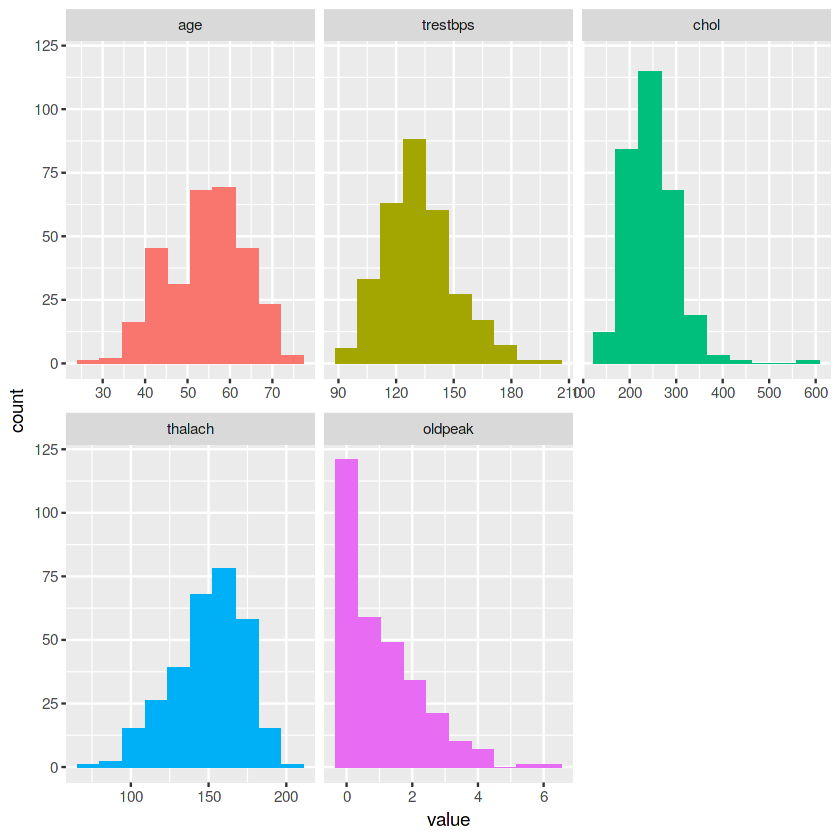

  target frequency percentage cumulative_perc
1    YES       165         54              54
2     NO       138         46             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

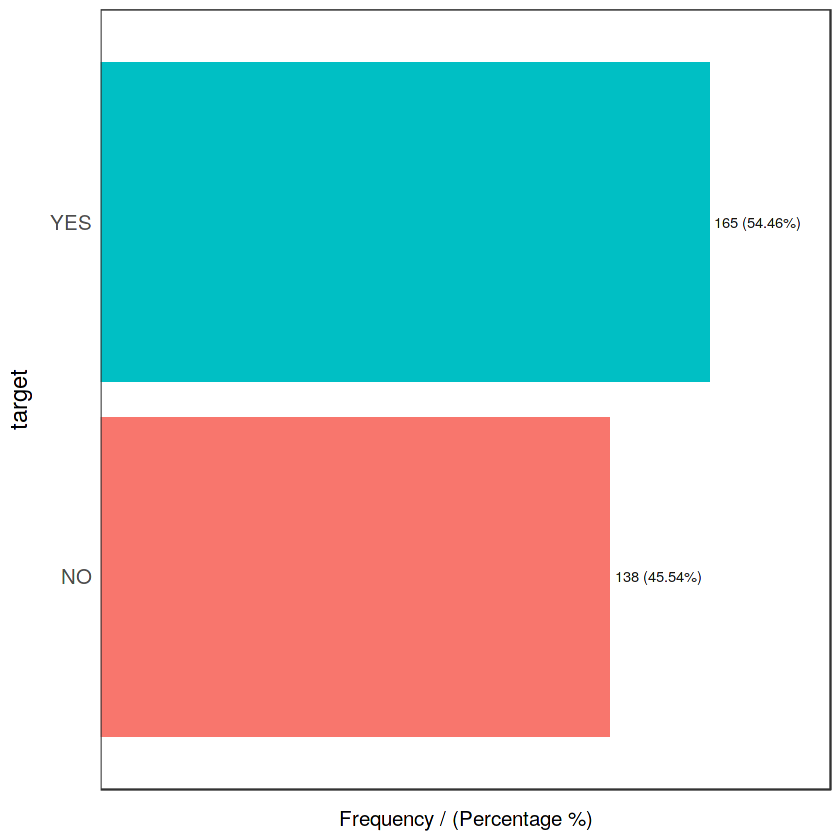

     sex frequency percentage cumulative_perc
1   MALE       207         68              68
2 FEMALE        96         32             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

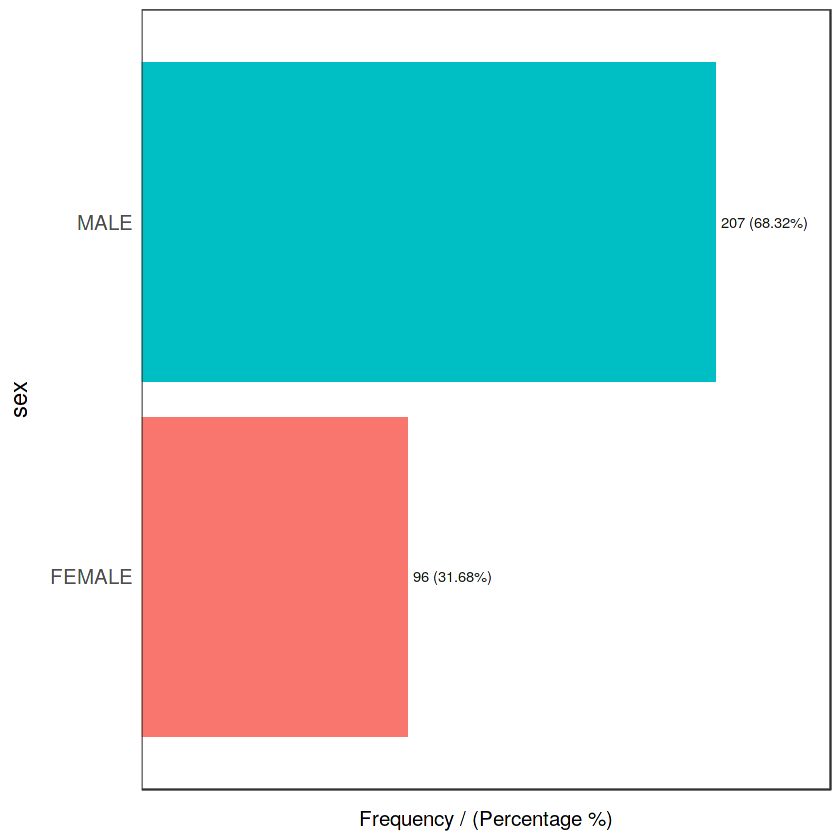

    fbs frequency percentage cumulative_perc
1 <=120       258         85              85
2  >120        45         15             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

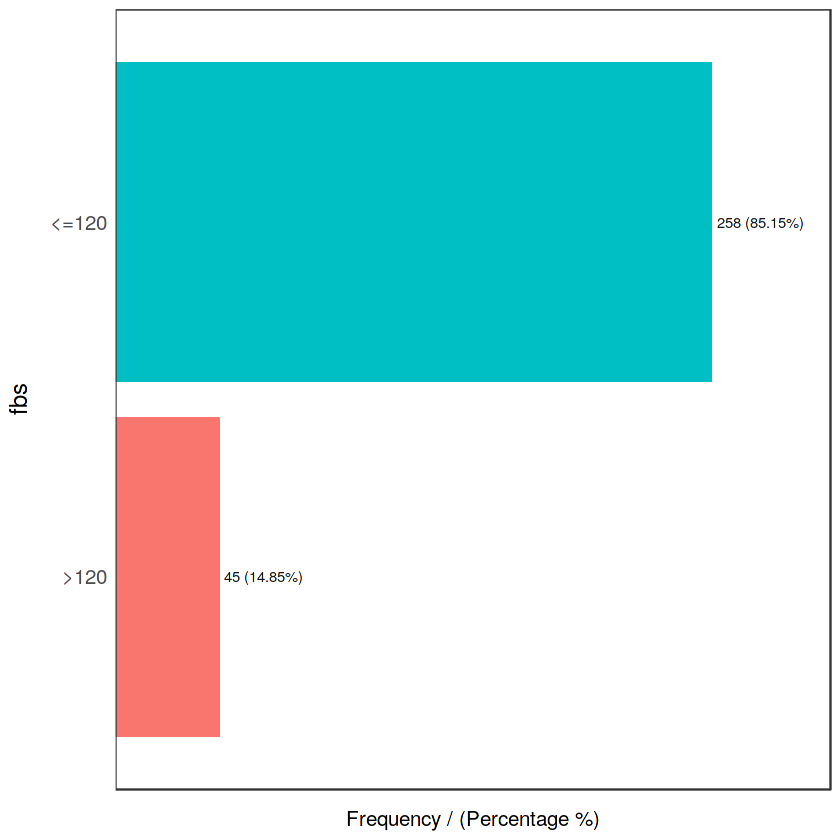

  exang frequency percentage cumulative_perc
1    NO       204         67              67
2   YES        99         33             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

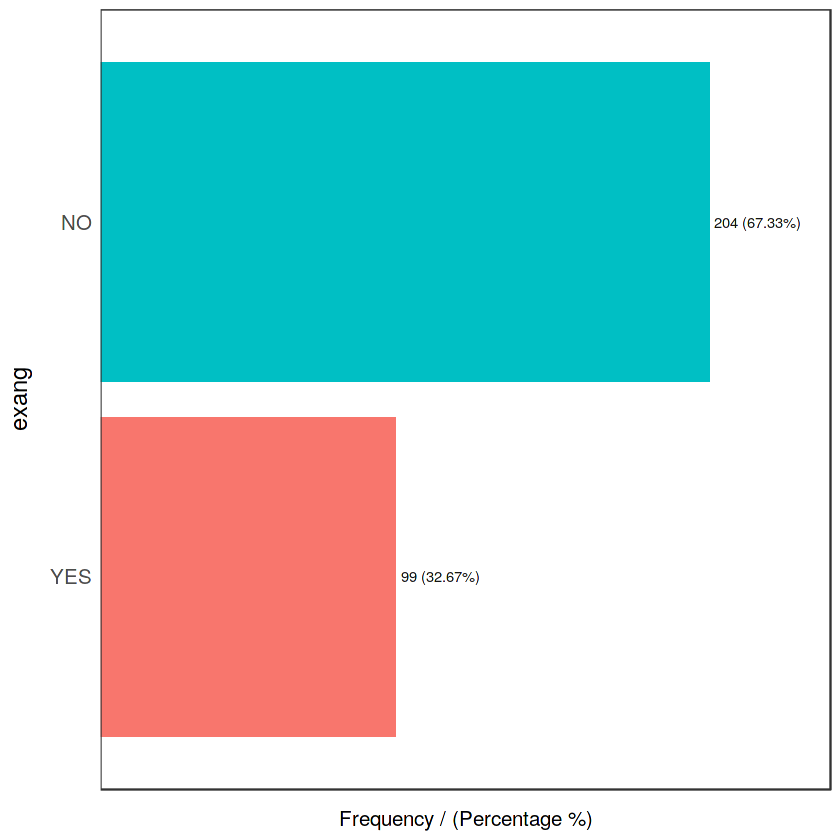

                cp frequency percentage cumulative_perc
1     ASYMPTOMATIC       166         55              55
2 NON-ANGINAL PAIN        87         29              84
3  ATYPICAL ANGINA        50         16             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

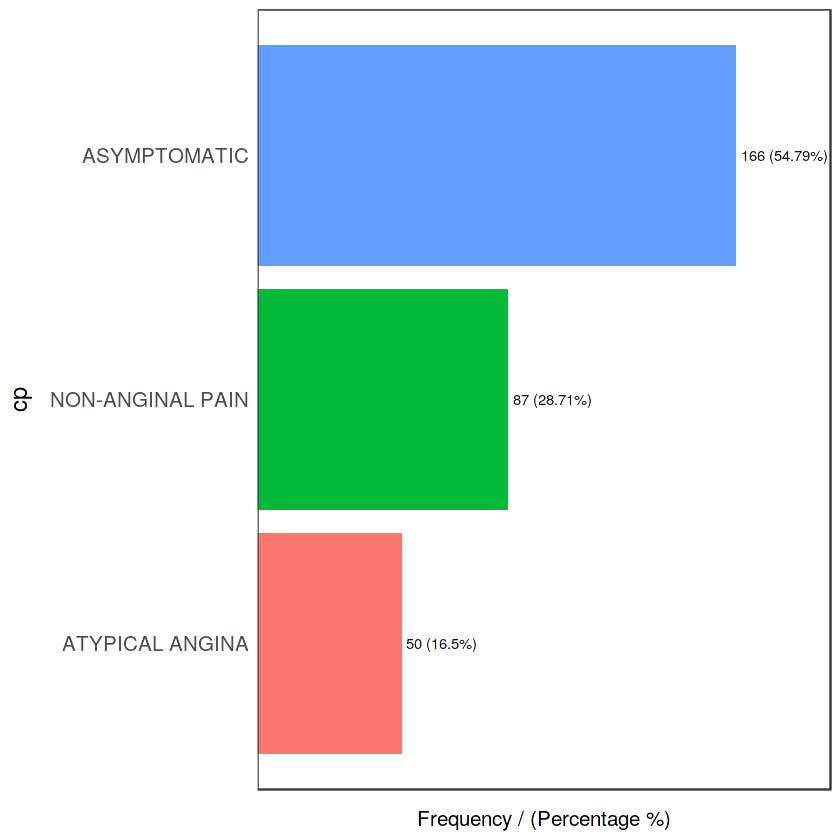

               restecg frequency percentage cumulative_perc
1          ABNORMALITY       152       50.2              50
2               NORMAL       147       48.5              99
3 PROBABLE OR DEFINITE         4        1.3             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

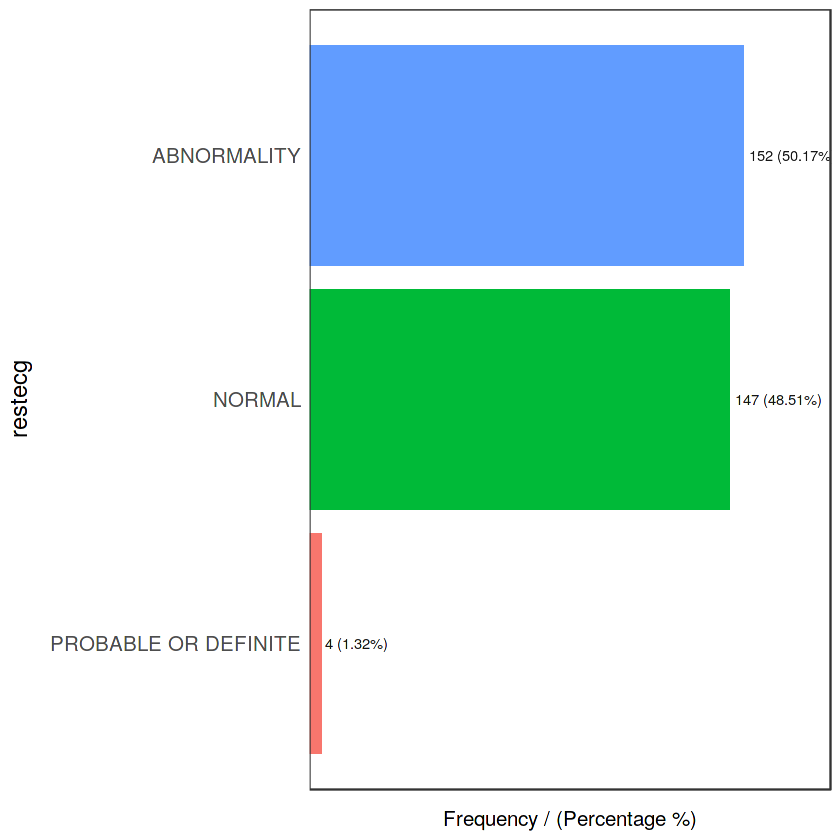

  slope frequency percentage cumulative_perc
1     2       142       46.9              47
2     1       140       46.2              93
3     0        21        6.9             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

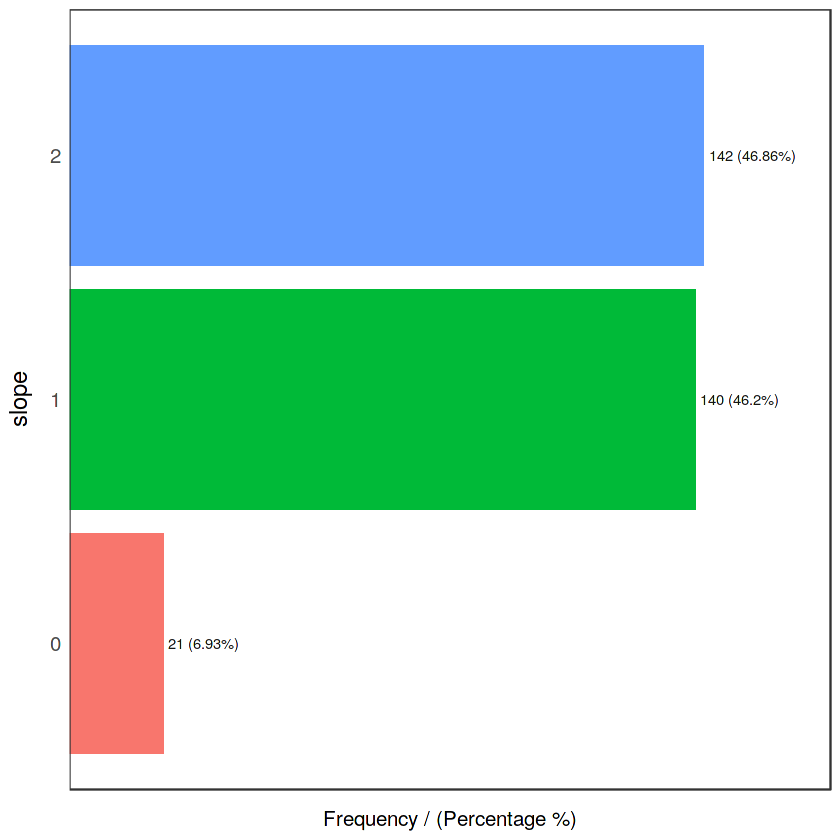

  ca frequency percentage cumulative_perc
1  0       175       57.8              58
2  1        65       21.4              79
3  2        38       12.5              92
4  3        20        6.6              98
5  4         5        1.6             100



Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”Warning message:
“Use of `tbl_plot$frequency` is discouraged. Use `frequency` instead.”Warning message:
“Use of `tbl_plot$category` is discouraged. Use `category` instead.”

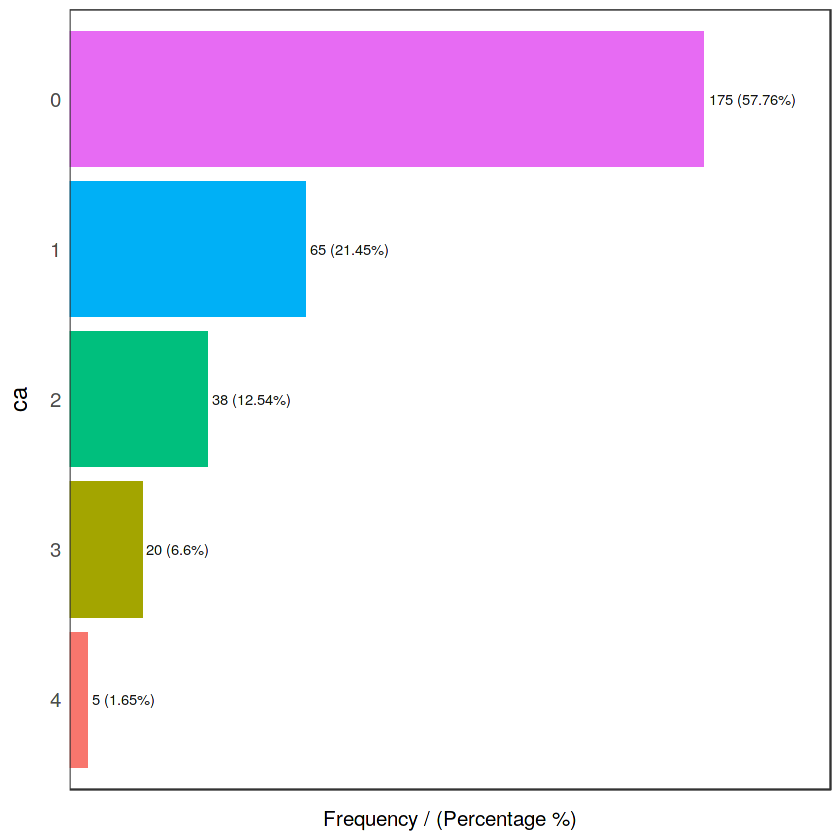

  thal frequency percentage cumulative_perc
1    2       166      54.79              55
2    3       117      38.61              93
3    1        18       5.94              99
4    0         2       0.66             100



[1] "Variables processed: target, sex, fbs, exang, cp, restecg, slope, ca, thal"

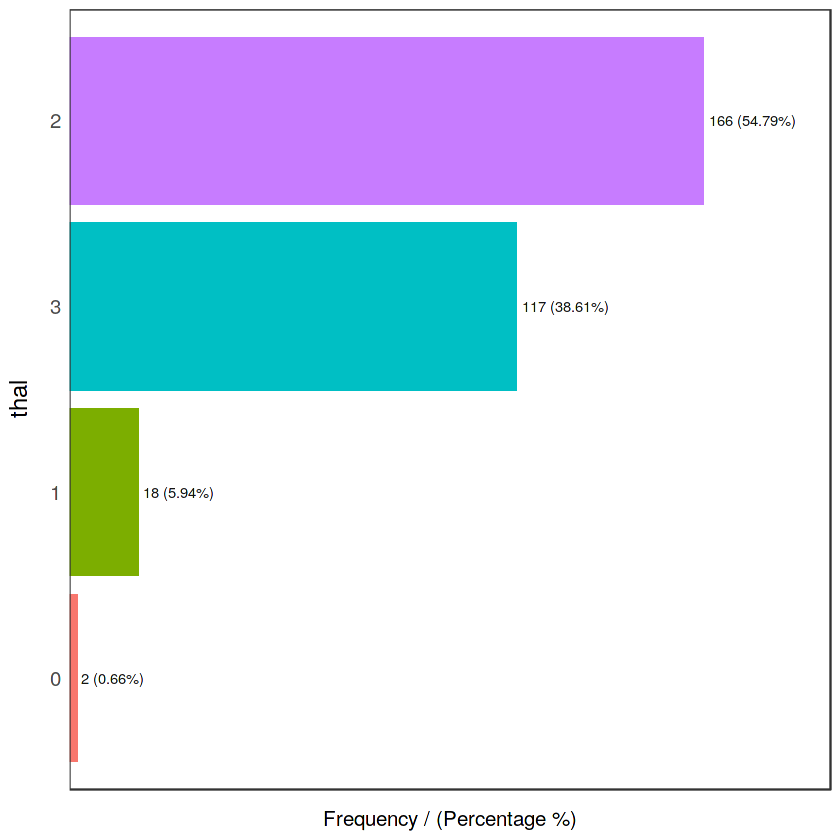

In [60]:
plot_num(data2[-15])

freq(data2)

<a id="subsection7"></a>
## 7.1. Random Forest

In [61]:
rf_fit <- randomForest(train_x, train_y, importance = TRUE)

rf_fit


Call:
 randomForest(x = train_x, y = train_y, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16%
Confusion matrix:
    NO YES class.error
NO  78  19        0.20
YES 15 101        0.13

,NO,YES,MeanDecreaseAccuracy,MeanDecreaseGini
sex,0.99,6.84,5.95,2.2
fbs,0.26,0.70,0.82,1.2
exang,11.18,5.15,11.47,6.1
cp,12.15,7.70,14.34,8.7
restecg,-1.01,2.54,1.50,1.7
slope,3.18,-2.07,0.63,3.3
ca,20.43,20.51,26.16,15.8
thal,10.63,11.36,15.22,10.4
age,4.68,4.33,6.40,8.3
trestbps,-4.32,-0.98,-3.73,6.4


Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  33   8
       YES  8  41
                                        
               Accuracy : 0.822         
                 95% CI : (0.727, 0.895)
    No Information Rate : 0.544         
    P-Value [Acc > NIR] : 2.84e-08      
                                        
                  Kappa : 0.642         
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.837         
            Specificity : 0.805         
         Pos Pred Value : 0.837         
         Neg Pred Value : 0.805         
             Prevalence : 0.544         
         Detection Rate : 0.456         
   Detection Prevalence : 0.544         
      Balanced Accuracy : 0.821         
                                        
       'Positive' Class : YES           
                                        

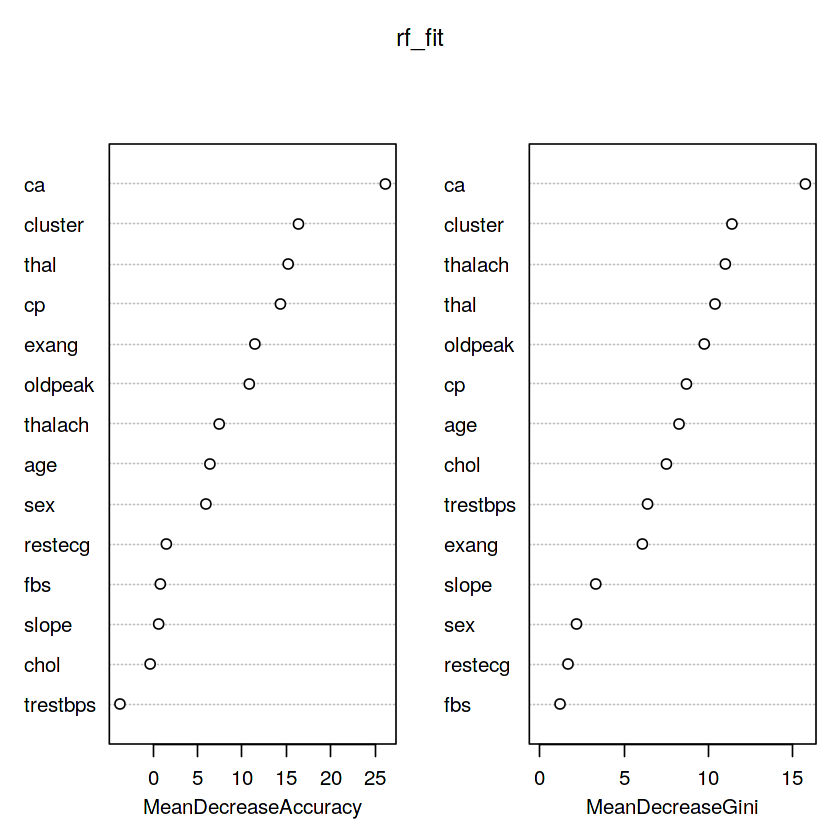

In [62]:
importance(rf_fit)

varImpPlot(rf_fit)

confusionMatrix(predict(rf_fit, test_x), test_y, positive = "YES")

In [63]:
# Model Tuning
control <- trainControl(method='cv', 
                        number=10, 
                        search='grid')
 
tunegrid <- expand.grid(mtry = (1:10)) 

rf_gridsearch <- train(target ~ ., 
                       data = train,
                       method = 'rf',
                       metric = 'Accuracy',
                       tuneGrid = tunegrid)

rf_gridsearch

Random Forest 

213 samples
 14 predictor
  2 classes: 'NO', 'YES' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 213, 213, 213, 213, 213, 213, ... 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa
   1    0.82      0.64 
   2    0.82      0.63 
   3    0.81      0.63 
   4    0.81      0.61 
   5    0.81      0.61 
   6    0.80      0.60 
   7    0.80      0.59 
   8    0.80      0.59 
   9    0.80      0.59 
  10    0.80      0.59 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  33   7
       YES  8  42
                                       
               Accuracy : 0.833        
                 95% CI : (0.74, 0.904)
    No Information Rate : 0.544        
    P-Value [Acc > NIR] : 7.07e-09     
                                       
                  Kappa : 0.663        
                                       
 Mcnemar's Test P-Value : 1            
                                       
            Sensitivity : 0.857        
            Specificity : 0.805        
         Pos Pred Value : 0.840        
         Neg Pred Value : 0.825        
             Prevalence : 0.544        
         Detection Rate : 0.467        
   Detection Prevalence : 0.556        
      Balanced Accuracy : 0.831        
                                       
       'Positive' Class : YES          
                                       

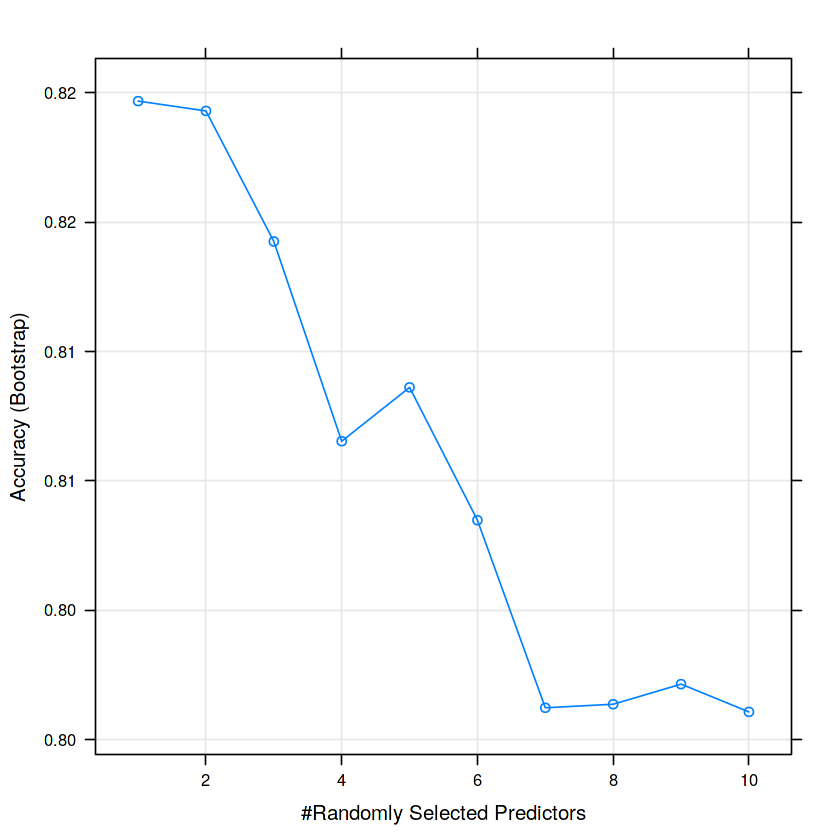

In [64]:
plot(rf_gridsearch)

confusionMatrix(predict(rf_gridsearch, test_x), test_y, positive = "YES")

In [65]:
rf_cm <- confusionMatrix(predict(rf_gridsearch, test_x), test_y, positive = "YES")
rf_cm

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  33   7
       YES  8  42
                                       
               Accuracy : 0.833        
                 95% CI : (0.74, 0.904)
    No Information Rate : 0.544        
    P-Value [Acc > NIR] : 7.07e-09     
                                       
                  Kappa : 0.663        
                                       
 Mcnemar's Test P-Value : 1            
                                       
            Sensitivity : 0.857        
            Specificity : 0.805        
         Pos Pred Value : 0.840        
         Neg Pred Value : 0.825        
             Prevalence : 0.544        
         Detection Rate : 0.467        
   Detection Prevalence : 0.556        
      Balanced Accuracy : 0.831        
                                       
       'Positive' Class : YES          
                                       

In [66]:
ds_rf <- defaultSummary(data.frame(obs = test_y, 
                          pred = predict(rf_gridsearch, test_x)))
ds_rf

Accuracy    Kappa 
    0.83     0.66